<a href="https://colab.research.google.com/github/Ritchie-Robinson/22024961_DataAnalytics/blob/main/22024961_Assignment_1_Data_Science_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

The purpose of this project is to investigate the relationship between weather and the number of traffic collisions on a given day in NYC, using data analysis techniques and principles to prepare the data for regression, including linear regression and deep neural network regression.

# Methodology

The Agile Kanban method, introduced in the 1950s within Toyota’s manufacturing process (Junior and Filho, 2010), focuses on visualising workflow and limiting work-in-progress (Damij and Damij, 2021). Furthermore, Kanban uses a just-in-time (JIT) delivery method and thus limits work-in-progress. This methodology helps ensure that bottlenecks and waiting times are reduced, which all lead to increased productivity (Alaidaros et al., 2021). Also, Kanban employs simple post-it notes or cards to manage and display tasks. This lends itself well to exploratory learning journeys and, thus, is a suitable methodology for this project. However, Saltz and Suthrland (2019) describe how Kanban lacks a structured iteration process for data science teams and instead propose a Structured Kanban Iteration (SKI) model.


## Schema

Data on collisions and weather in NYC are used for this analysis. The schema for the datasets is available on Google Cloud (2023) and is shown below, with the collision schema in Figure 1 and the weather schema in Figure 2:

### Collision Schema

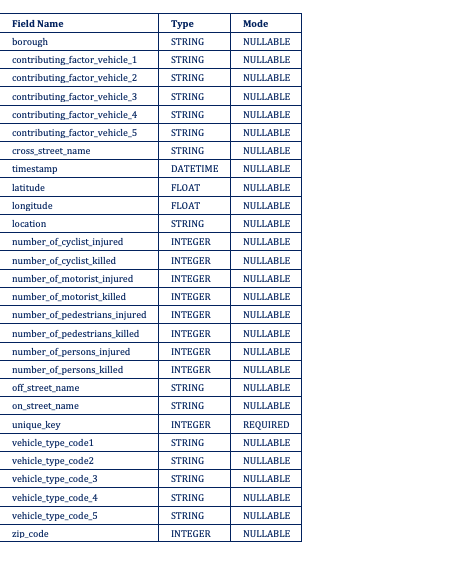<br>Figure 1 collision schema

### Weather Schema

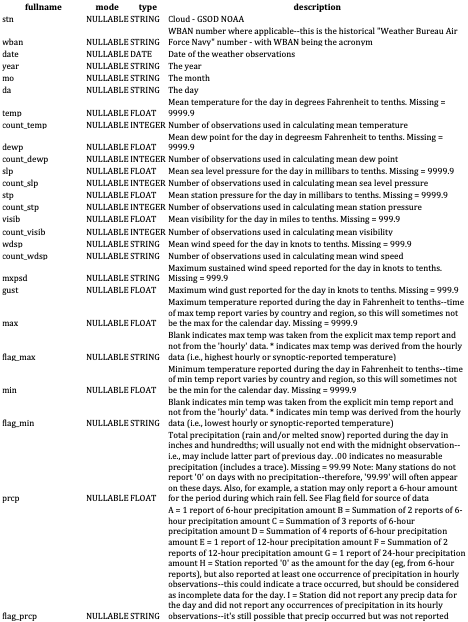
<br>
Figure 2 weather schema

##Data Cleaning and Import

Xiong et al. (2006) state that data cleaning at the data collection stage is about “detecting and removing low-level errors and inconsistencies," often due to imperfect data collection. Upon studying the schema and viewing the data through SELECT commands in Google BigQuery (2023), it became apparent that data cleaning would be required due to missing data denoted by obscure values, such as 99.99 or 9999.9. As a result, using the following SQL queries with conditional statements, the data was cleaned, and missing or obscure values were replaced with NULL or 0 where appropriate, before being collated. Furthermore, columns were renamed for clarity and ease of reading, as shown in Figure 3.

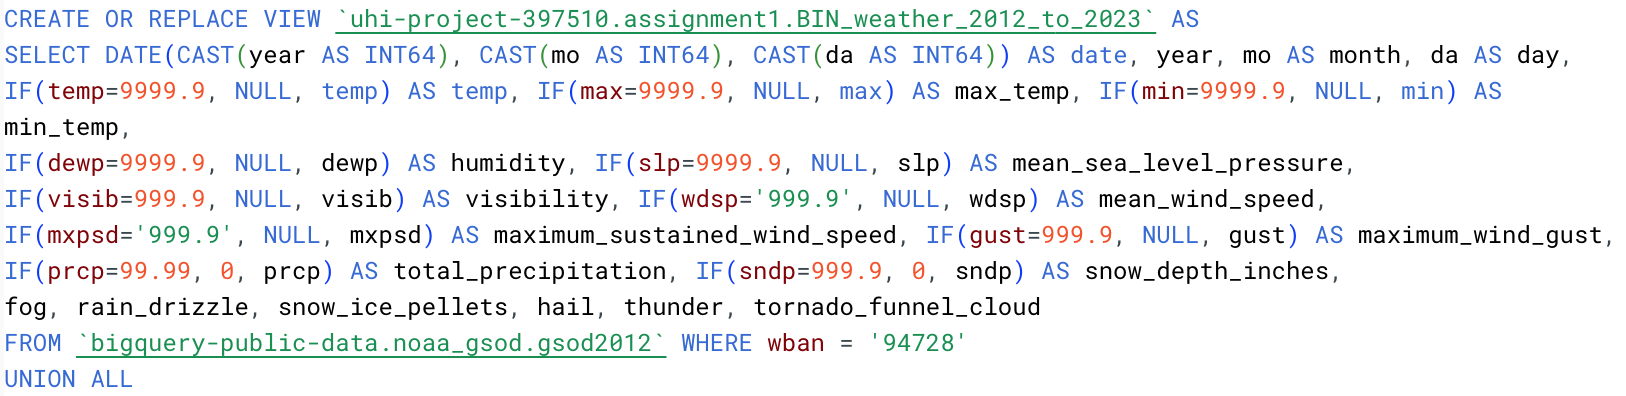
Figure 3 SQL command to clean data and rename columns

We have assumed that the weather plays a role in the number of collisions on any given day. As a result, we have added a day of the week number (day_num) to represent each day from 1 to 7 so that we can easily identify each day.

The data was exported from BigQuery as a CSV and stored on a GitHub (2023) repository. Here is the link to the raw data file being read by the read.csv() function.

In [ ]:
#import csv docs
#all time (2012-2023) weather and collision data
bin_col_12_23 <- read.csv('https://raw.githubusercontent.com/Ritchie-Robinson/22024961_DataAnalytics/main/INC_BIN_collated_2012_2023.csv')

Upon reading the data into Colab, the top rows of the data are viewed to check that the columns and values are as expected.

In [ ]:
#view first 6 rows
head(bin_col_12_23)

,day_num,year,month,day,collision_date,temp,max_temp,min_temp,humidity,mean_sea_level_pressure,⋯,maximum_wind_gust,total_precipitation,snow_depth_inches,fog,rain_drizzle,snow_ice_pellets,hail,thunder,tornado_funnel_cloud,num_collisions
,<int>,<int>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,4,2019,1,17,2019-01-17,30.1,39.0,24.1,10.0,1026.1,⋯,NA,0.00,0.0,0,0,0,0,0,0,586
2,5,2014,1,24,2014-01-24,14.7,19.4,10.4,-3.6,NA,⋯,NA,0.00,7.1,0,0,0,0,0,0,705
3,7,2019,1,27,2019-01-27,39.6,48.9,24.1,22.2,1018.6,⋯,NA,0.00,0.0,0,0,0,0,0,0,445
4,3,2019,1,2,2019-01-02,38.0,57.9,35.1,23.2,1024.2,⋯,NA,0.06,0.0,0,0,0,0,0,0,502
5,1,2019,1,14,2019-01-14,26.7,33.1,21.9,11.2,1024.2,⋯,NA,0.00,0.0,0,0,0,0,0,0,703
6,3,2019,1,9,2019-01-09,42.7,45.0,34.0,30.1,1001.6,⋯,NA,0.16,0.0,0,1,0,0,0,0,514


Todd (2007) outlines two crucial measures in summary statistics: measures of location, which describe the centre, and measures of spread, which indicate variability. In R, summarising each column provides these descriptive statistics. The output includes a mix of categorical and numeric data, featuring quartiles, minimum and maximum values, median, and mean for numeric variables, offering a view of the data's distribution. Additionally, the presence of NA values is highlighted, indicating missing data.

In [ ]:
summary(bin_col_12_23)

    day_num       year          month             day       collision_date    
 Min.   :1   Min.   :2012   Min.   : 1.000   Min.   : 1.0   Length:4122       
 1st Qu.:2   1st Qu.:2015   1st Qu.: 4.000   1st Qu.: 8.0   Class :character  
 Median :4   Median :2018   Median : 7.000   Median :16.0   Mode  :character  
 Mean   :4   Mean   :2018   Mean   : 6.567   Mean   :15.7                     
 3rd Qu.:6   3rd Qu.:2020   3rd Qu.: 9.000   3rd Qu.:23.0                     
 Max.   :7   Max.   :2023   Max.   :12.000   Max.   :31.0                     
                                                                              
      temp          max_temp         min_temp        humidity     
 Min.   : 6.90   Min.   : 15.10   Min.   :-0.90   Min.   :-16.10  
 1st Qu.:42.70   1st Qu.: 51.80   1st Qu.:35.60   1st Qu.: 27.40  
 Median :57.60   Median : 68.00   Median :48.90   Median : 43.70  
 Mean   :56.49   Mean   : 65.99   Mean   :48.44   Mean   : 42.09  
 3rd Qu.:71.90   3rd Qu.: 82.00  

# Initial Analysis

Upon plotting the years against the number of daily collisions, there was a drastic change in the number of daily collisions in the most recent years. It is assumed that the COVID era and subsequent government-mandated lockdowns are likely the cause of a reduction in the number of daily collisions in the years 2020 and 2021. However, as can be seen in the plot below, interestingly, the number of collisions in 2022 and 2023 still appears reduced despite there being an end to lockdowns. According to New York State (2021), New York lockdowns occurred from 07-03-2020 to 24-06-2021. As a result, this data anomaly deserves further investigation as to the cause of the continued reduced daily collisions, but we can make assumptions around behaviour changes due to COVID, such as remote working. However, for now, the data will be split into two data sets: pre-lockdown and post-lockdown, for further analysis.

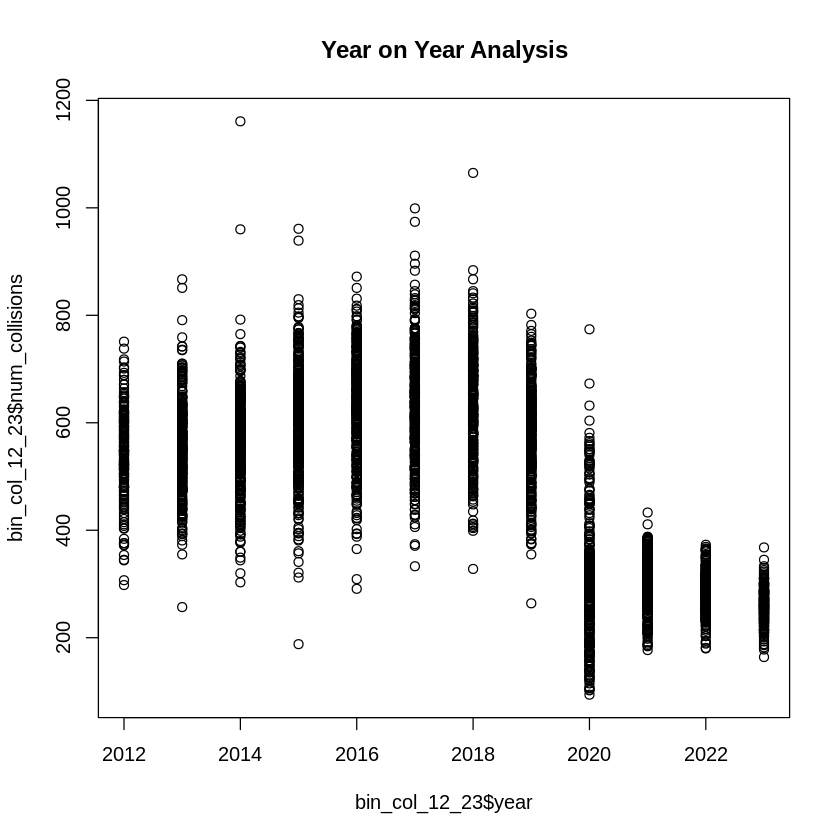

In [ ]:
# plotting the years against the number of collisions
plot(bin_col_12_23$year, bin_col_12_23$num_collisions, main="Year on Year Analysis")

Here, the data will be split into two date ranges based on pre- and post-lockdowns in New York.

In [ ]:
#convert dates as objects (Dates based on Pre and Post New York lockdowns)
start_collision_date_1 <- as.Date("2012-01-01")
end_collision_date_1 <- as.Date("2020-06-03")

start_collision_date_2 <- as.Date("2020-06-03")
end_collision_date_2 <- Sys.Date()  #today

#create logical indices
index_condition1 <- bin_col_12_23$collision_date >= start_collision_date_1 & bin_col_12_23$collision_date <= end_collision_date_1
index_condition2 <- bin_col_12_23$collision_date >= start_collision_date_2 & bin_col_12_23$collision_date <= end_collision_date_2

#create new pre and post dataframes based on the index conditions of date range
pre_lockdown <- bin_col_12_23[index_condition1, ]
post_lockdown <- bin_col_12_23[index_condition2, ]

# Pre Lockdown (01-01-2012 to 06-03-2020)

## **Analyse Independent Variable**

The following variables have shown a correlation and as such, require more analysis:

* day_num (day of the week)
* year
* month
* visibility
* max_temp
* temp
* min_temp

These independent variables are not suitable for the linear model or show no correlation:


* day (of month): num_day is a better measure
* collision_date: no correllation
* humidity: no correlation
* mean_sea_level: no correlation
* maximum_wind_gust: more accidents seem to occur in a lower maximum wind gust but this is likely due to lower winds most of the time
* total_precipitation: more collisions seem to occur with lower total precipitation but this could be due to lower total precipitation most of the time, or more road users in dryer weather when precipitation is lower.
* snow_depth_inches: again, the data seems to show more collisions in lower snow_depth_inches but this is also likely due to the previous reason.
* fog, rain_drizzle, snow_ice_pellets, hail, thunder, and turnado_funnel_cloud: all omitted as this is binary data and not suitable for a linear regression model but will be used later with a DNN.




## Day of the Week

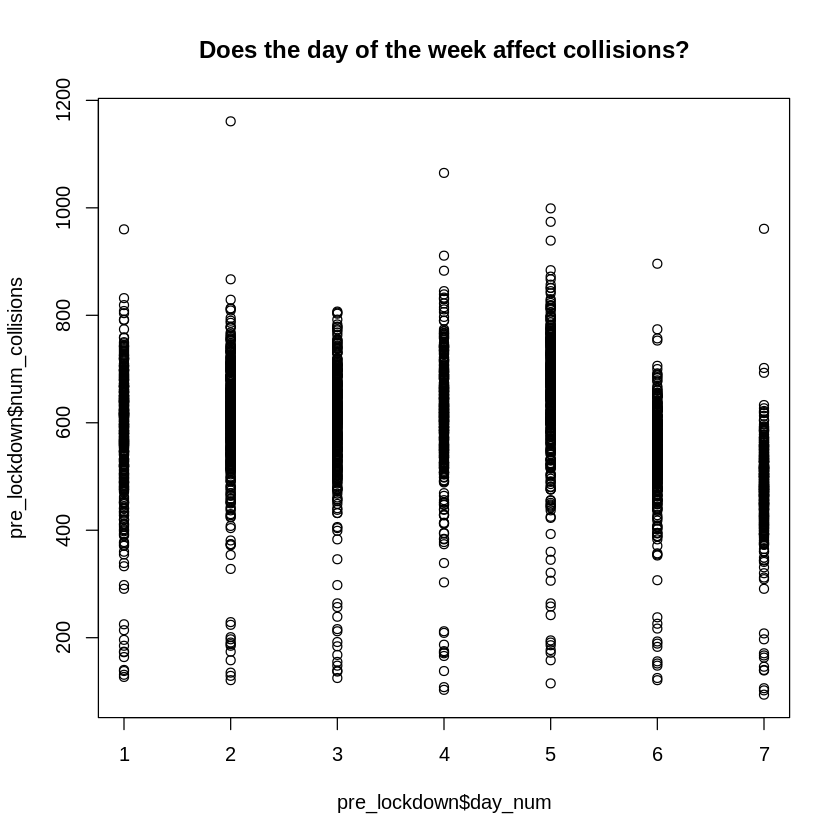

In [ ]:
#plotting day of the week
plot(pre_lockdown$day_num, pre_lockdown$num_collisions, main="Does the day of the week affect collisions?")

There appears to be a correlation between the day of the week and the number of collisions. Osborne and Overby (2004) present strong arguments for the removal or alteration of outliers with empirical evidence that demonstrates the benefit of increased accuracy in estimates. As a result, we can remove outliers to make the correlation clearer and the relationship in our model more accurate.

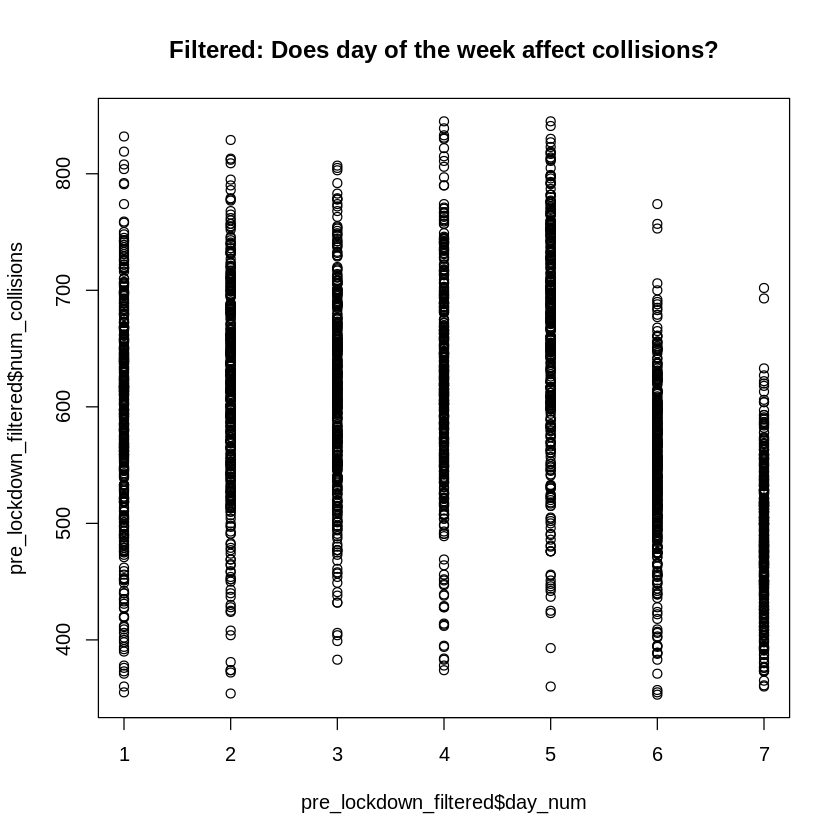

In [ ]:
#create logical index for num_collisions between 350 and 850
valid_range <- pre_lockdown$num_collisions >= 350 & pre_lockdown$num_collisions <= 850

#subset dataframe to remove outliers
pre_lockdown_filtered <- pre_lockdown[valid_range, ]

#plot new dataset
plot(pre_lockdown_filtered$day_num, pre_lockdown_filtered$num_collisions, main = "Filtered: Does day of the week affect collisions?")

Bhandari (2023) explains that normally distributed data follows a bell shape, with most values sitting around a central region and tapering off as they go further away from the centre. AKA Gaussian distributions. Now that we have removed outliers, we can see below that we have a loosely normal distribution for the number of collisions, indicating that the occurrences of collisions are symmetrically distributed around the mean.

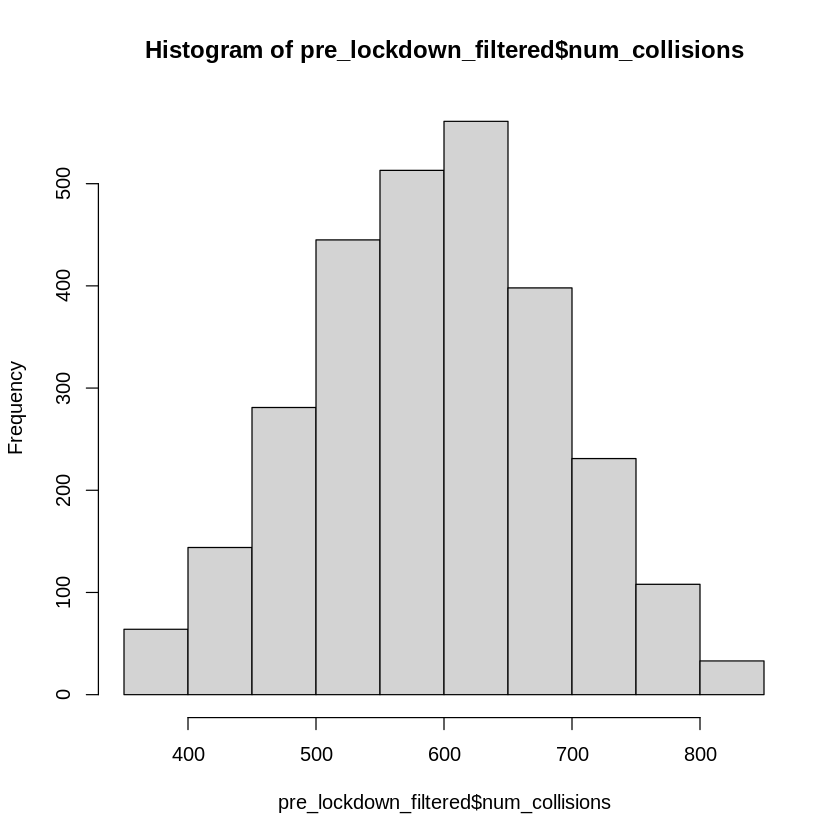

In [ ]:
hist(pre_lockdown_filtered$num_collisions, breaks =8)

We should now re-order the days of the week to create a clear positive linear relationship and visualise this with a boxplot. We can re-order these days because their order bears no significance to the data; in that, their significance lies only in days that result in more collisions than others, but the order of these days holds no effect on the analysis itself, and thus, we can re-order them to show the linear relationship for our model.

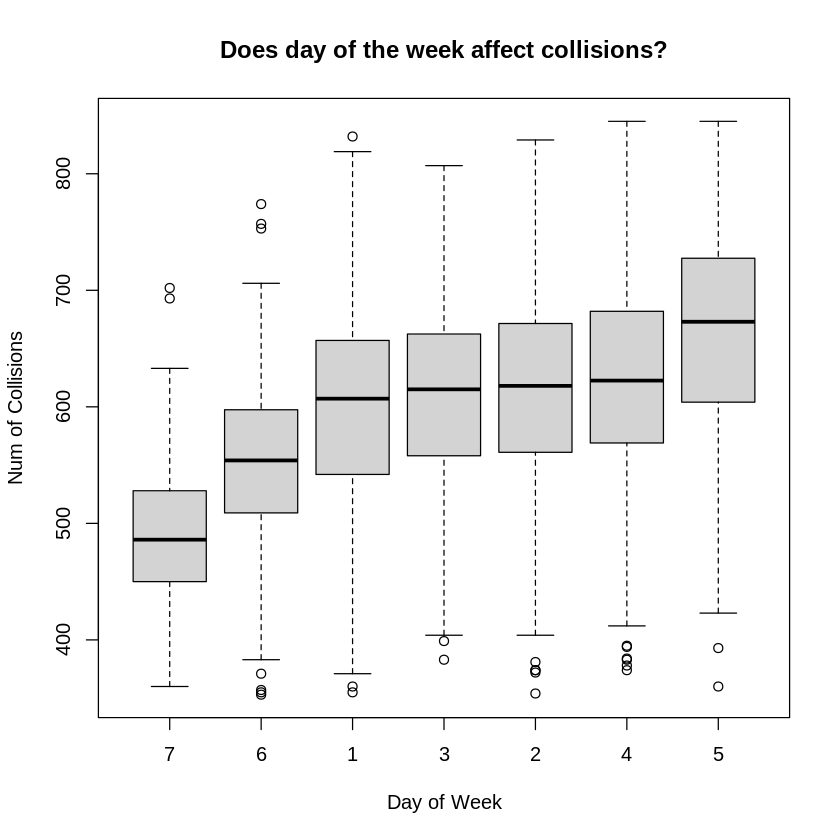

In [ ]:
#re-order for days
re_order <- c("7", "6", "1", "3", "2", "4", "5")

#convert 'day_num' to factor with re-order
pre_lockdown_filtered$day_num <- factor(pre_lockdown_filtered$day_num, levels = re_order)

#box plot
boxplot(
  pre_lockdown_filtered$num_collisions ~ pre_lockdown_filtered$day_num,
  main = "Does day of the week affect collisions?",
  xlab = "Day of Week",
  ylab = "Num of Collisions"
)

##Month

There is a weak positive correlation between the month and the number of collisions. The value of 0.17228 implies that there is a slight tendency for an increase in collisions as we move through the months. However, the relationship is not very strong. However, this highlights the importance of considering seasonality and the periodic nature of time. This weak positive correlation suggests there may be a subtle pattern or trend that repeats across months.

In [ ]:
cor(pre_lockdown_filtered$month, pre_lockdown_filtered$num_collisions)

[1] 0.1722855

We can see this seasonal pattern more clearly with a box plot. We can see that June is the peak, and there is a steady rise from September to November. This is likely due to more road use, but more investigation is needed to clarify this. Furthermore, there are several outliers likely due to public holidays. Month, along with year, will be useful variables to use with the DNN later in this project, but these variables will give us no more information than the day of the week when used within a linear model.

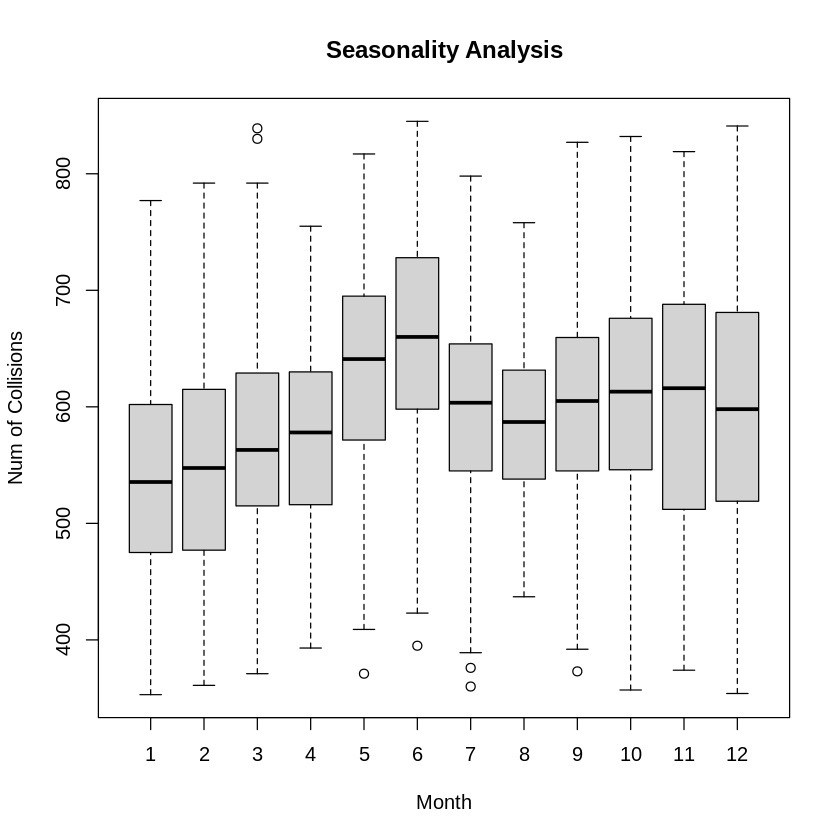

In [ ]:
#box plot to analyse seasonality
boxplot(
  pre_lockdown_filtered$num_collisions ~ pre_lockdown_filtered$month,
  main = "Seasonality Analysis",
  xlab = "Month",
  ylab = "Num of Collisions"
)

## Visibility

In [ ]:
cor(pre_lockdown_filtered$visibility, pre_lockdown_filtered$num_collisions)

[1] NA

The correlation function does not work when missing values are present. As can be seen below, 31 rows have missing values for visibility.

In [ ]:
#count
total_count <- nrow(pre_lockdown_filtered)
na_count <- sum(is.na(pre_lockdown_filtered$visibility))
non_na_count <- sum(!is.na(pre_lockdown_filtered$visibility))

#print the results
print(paste("Total Rows =", total_count))
print(paste("Non-NA Rows =", non_na_count))
print(paste("Missing Rows =", na_count))


[1] "Total Rows = 2778"
[1] "Non-NA Rows = 2747"
[1] "Missing Rows = 31"


However, the correlation function will also not work when vectors have different lengths, as can be seen below.

In [ ]:
length(na.omit(pre_lockdown_filtered$visibility))
length(na.omit(pre_lockdown_filtered$num_collisions))

[1] 2747

[1] 2778

Therefore, before calculating correlation the rows without missing values need to be extracted. As can be seen, the result of -0.04402616 shows a very weak negative correlation. i.e. when visibility.

In [ ]:
correlation_matrix <- cor(na.omit(pre_lockdown_filtered[, c("visibility", "num_collisions")]))
correlation_value <- correlation_matrix[1, 2]

print(correlation_value)

[1] -0.04402616


Visibility is a measure of the distance at which objects can be clearly distinguished (miles to tenths). Higher visibility values, e.g., 10, mean clearer conditions, while lower values, e.g., 0, suggest reduced visibility.

In [ ]:
#display first rows of visibility column
head(pre_lockdown_filtered$visibility)


[1] 10.0   NA 10.0 10.0 10.0  8.8

Looking at visibility, there was a negative linear relationship, with an increase in collisions as visibility went down, as can be seen below.

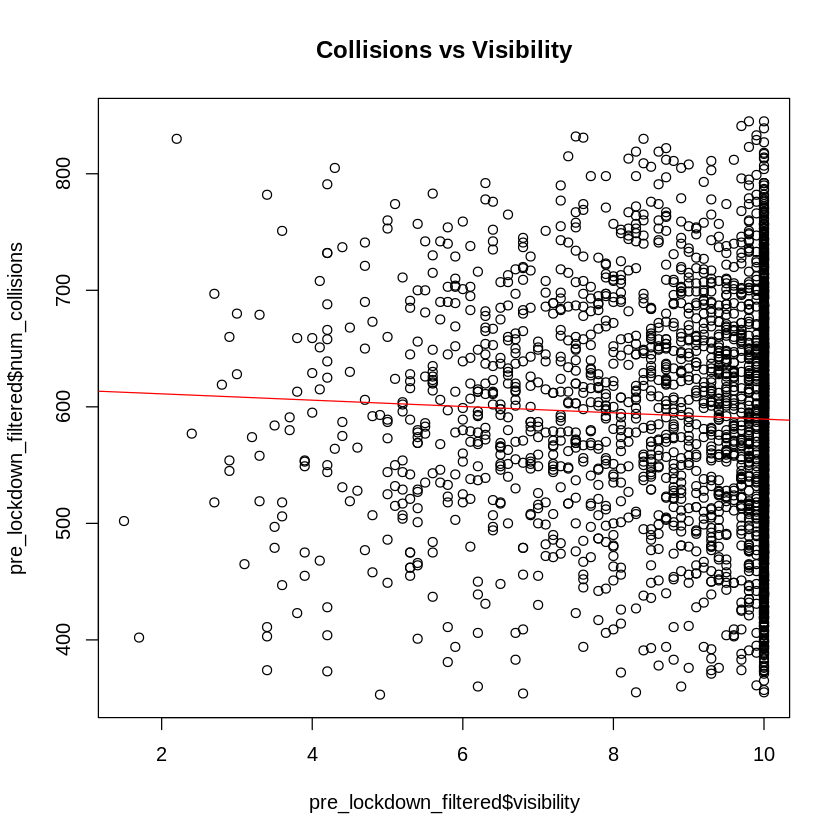

In [ ]:
#scatter plot of raw data
plot(pre_lockdown_filtered$visibility, pre_lockdown_filtered$num_collisions, main = "Collisions vs Visibility")

#add a trend line
visib_fit <- lm(num_collisions ~ visibility, data = pre_lockdown_filtered)
abline(visib_fit, col = "red")


Likewise, the negative linear relationship remains when missing values are omitted.

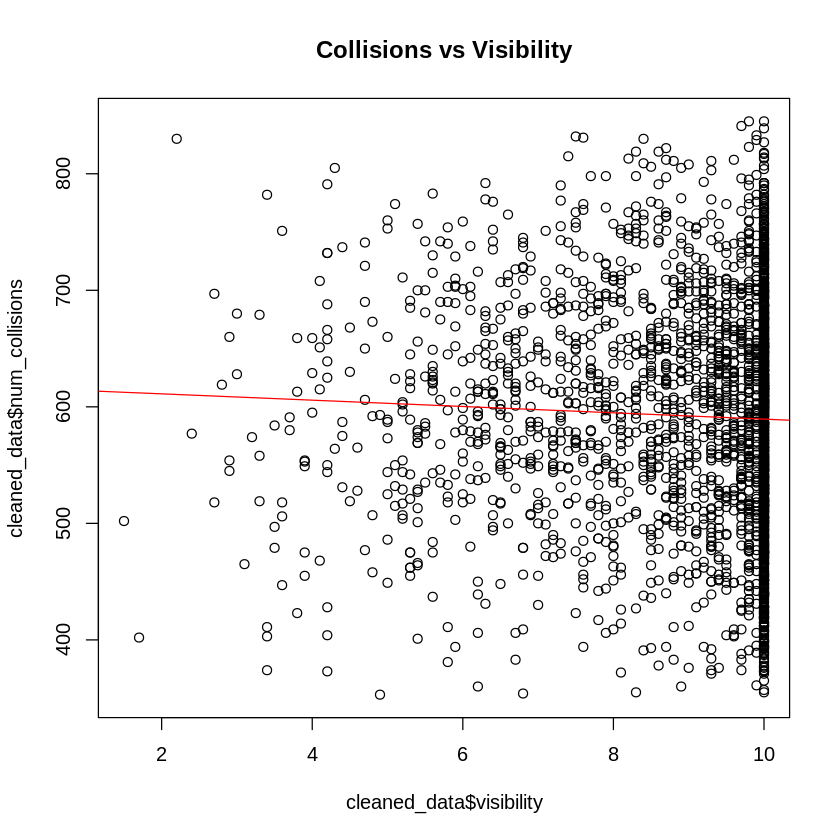

In [ ]:
#remove rows with missing values
cleaned_data <- na.omit(pre_lockdown_filtered[, c("visibility", "num_collisions")])

#scatter plot of cleaned data
plot(cleaned_data$visibility, cleaned_data$num_collisions, main = "Collisions vs Visibility")

#add a trend line
visib_fit <- lm(num_collisions ~ visibility, data = cleaned_data)
abline(visib_fit, col = "red")


In [ ]:
summary(visib_fit)


Call:
lm(formula = num_collisions ~ visibility, data = cleaned_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-250.255  -67.427    2.626   65.048  255.573 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  616.540     10.690  57.675   <2e-16 ***
visibility    -2.711      1.174  -2.309    0.021 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 95.35 on 2745 degrees of freedom
Multiple R-squared:  0.001938,	Adjusted R-squared:  0.001575 
F-statistic: 5.331 on 1 and 2745 DF,  p-value: 0.02102


The coefficient for visibility is -2.711, suggesting that, on average, for each unit increase in visibility, the number of collisions is estimated to decrease by 2.711 units. Both coefficients are statistically significant with very low p-values, indicating that they are unlikely to be due to randomness.

The residuals, representing the differences between observed and predicted values, exhibit a range from -250.255 to 255.573. These values suggest that the model's predictions can deviate substantially from the actual number of collisions. The residual standard error is 95.35.

The multiple R-squared value of 0.001938 shows that only a small proportion (less than 0.2%) of the variation in the number of collisions is explained by the model, with the adjusted R-squared also very low (0.001575). The F-statistic p-value (0.02102) is below the conventional significance level of 0.05, indicating that the model is statistically significant. Despite the significance, the low R-squared values indicate that visibility alone does not explain much of the variability in collisions. Therefore, this highlights the need to consider other factors that are influencing the number of collisions.

As Hutcheson (2012) explains, missing data points are common in data sets, and to handle this issue, data scientists can employ various strategies, such as eliminating entire observations. Although Hutcheson (2012) goes on to describe the dangers of this approach, such as the loss of valuable information or, worse, severe selection bias, and concludes by explaining that better solutions are to replace the missing values with random values, mean values, or values imputed. In this case, as there are only 31 missing values out of 2778, we will replace the missing values with the mean value.

In [ ]:
#check for missing values in max_temp
missing_values <- is.na(pre_lockdown_filtered$visibility)

#view the count of missing values
cat("Number of missing values in visibility:", sum(missing_values), "\n")

#replace missing values with mean
pre_lockdown_filtered$visibility[missing_values] <- mean(pre_lockdown_filtered$visibility, na.rm = TRUE)

Number of missing values in visibility: 31 


In [ ]:
#check for missing values in max_temp
missing_values <- is.na(pre_lockdown_filtered$visibility)

#view the count after replacing to check it worked
cat("Number of missing values in visibility after replacement:", sum(missing_values), "\n")

Number of missing values in visibility after replacement: 0 


##Max Temp

Asuero et al. (2006) state that regression is used for prediction and correlation is used to determine the degree of association. In the below correlation coefficient value (0.2306), it indicates a positive correlation (although weak) between the maximum temperature and the number of collisions. It suggests that, on average, as the maximum temperature increases, there is a tendency for the number of collisions to increase as well. More specifically, as highlighted by the regression coefficient in the results of the summary function, it predicts that a one-unit increase in maximum temperature is associated with a 1.2325-unit increase in collisions.

In [ ]:
cor(pre_lockdown_filtered$max_temp, pre_lockdown_filtered$num_collisions)

[1] 0.2306173

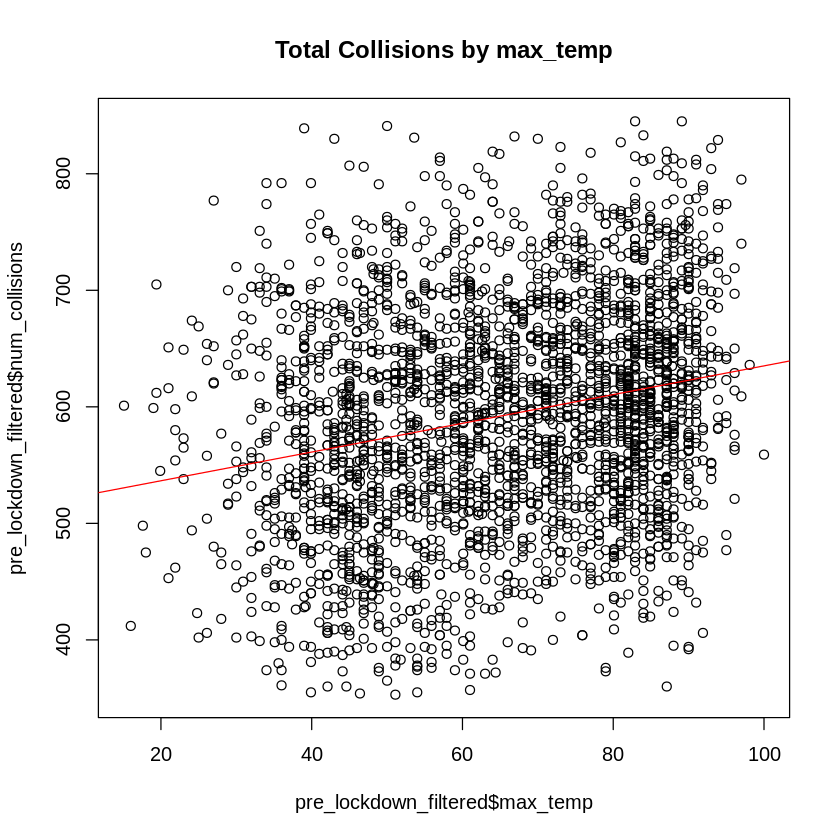

In [ ]:
#plot temp data
plot(pre_lockdown_filtered$max_temp, pre_lockdown_filtered$num_collisions, main = "Total Collisions by max_temp")

#add line of best fit
temp_fit <- lm(pre_lockdown_filtered$num_collisions ~ pre_lockdown_filtered$max_temp)
abline(temp_fit, col = "red")

In [ ]:
summary(temp_fit)


Call:
lm(formula = pre_lockdown_filtered$num_collisions ~ pre_lockdown_filtered$max_temp)

Residuals:
     Min       1Q   Median       3Q      Max 
-259.276  -65.056   -1.412   65.576  279.006 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    511.9284     6.6747   76.70   <2e-16 ***
pre_lockdown_filtered$max_temp   1.2325     0.0987   12.49   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 93.02 on 2776 degrees of freedom
Multiple R-squared:  0.05318,	Adjusted R-squared:  0.05284 
F-statistic: 155.9 on 1 and 2776 DF,  p-value: < 2.2e-16


Overall, the model is statistically significant, suggesting that there is a relationship between max_temp and num_collisions.

The regression coefficient for max_temp suggests a positive relationship. The *** symbols indicate a very high level of significance for both the intercept and max temp, which shows both are statistically significant.

However, the low R-squared value of approximately 5.32% indicates that the linear model explains a relatively small proportion of the variability in collisions. Therefore, there are clearly other factors influencing num_collisions too, such as the already identified visibility and day of the week variables.

## Input Variables

After analysis, the input variables to consider for modelling are day_num, and max_temp. However, min_temp and temp were equally as useful as max_temp, but they gave no more information than using max_temp alone. Furthermore, including all three variables (min_temp, temp, and max_temp) introduces multicollinearity in linear regression, whereby it becomes difficult for the model to separate the individual effects of the correlated variables on the dependent variable, and thus, it becomes unclear which variable is having a unique impact. Shrestha (2020) states that multicollinearity occurs when several variables “are significantly correlated not only with the dependent variable but also to each other." The linear correlation between the temperature variables can be assumed with common sense. However, they can also be visualised in the below scatterplot. Whereas there is no linear relationship between day_num, visibility, and max_temp, as shown below.

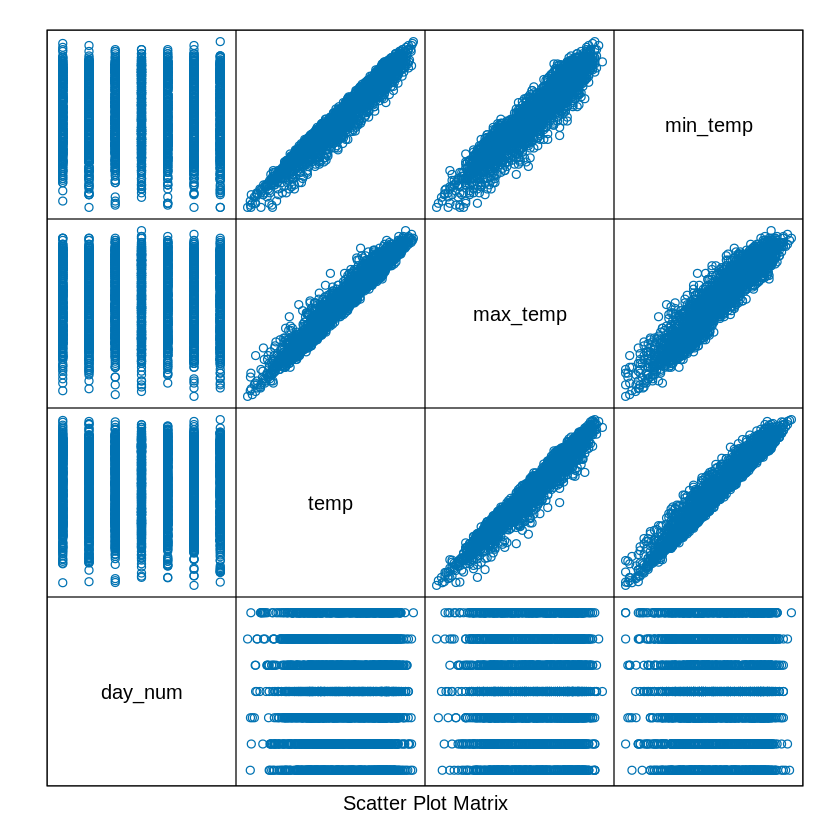

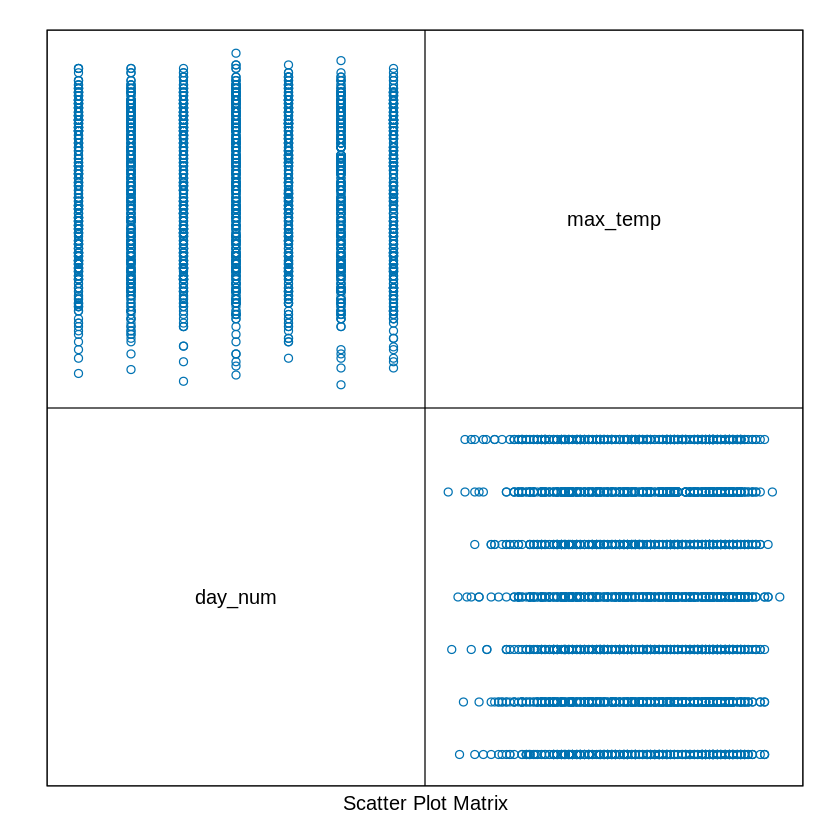

In [ ]:
#install and load lattice package if not already installed
if (!requireNamespace("lattice", quietly = TRUE)) {
  install.packages("lattice")
}

# load lattice package
library(lattice)

#create scatterplot matrix with all
splom(~ pre_lockdown_filtered[,c(1, 6, 7, 8)], groups=NULL, data=pre_lockdown_filtered,
axis.line.tck=0, axis.text.alpha=0)

#create scatterplot matrix negate multicollinearity
splom(~ pre_lockdown_filtered[,c(1, 7)], groups=NULL, data=pre_lockdown_filtered,
axis.line.tck=0, axis.text.alpha=0)

# Post Lockdown (07-03-2020 to Latest)

##Analyse Independent Variable

Although our pre-lockdown dataset meets the “two subjects per variable” (2SPV) rule of thumb that helps to avoid overfitting (Hanley, 2016), it is generally considered that a larger sample size is better for precision. As a result, we will analyse the post-lockdown data to see if we can normalise values and amalgamate both pre- and post-lockdown data to create a larger sample.


##Visibility

Let us first check for, and replace, missing values with the mean, if present.

In [ ]:
#check for missing values in max_temp
missing_values_post <- is.na(post_lockdown_filtered$visibility)

#view the count of missing values
cat("Number of missing values in visibility:", sum(missing_values_post), "\n")

# #replace missing values with mean
post_lockdown_filtered$visibility[missing_values_post] <- mean(post_lockdown_filtered$visibility, na.rm = TRUE)

Number of missing values in visibility: 2 


Now let us check the correlation between visibility and num_collisions in post-lockdown data.

In [ ]:
correlation_matrix_post <- cor(na.omit(post_lockdown[, c("visibility", "num_collisions")]))
correlation_value_post <- correlation_matrix_post[1, 2]

print(correlation_value_post)

[1] 0.06631091


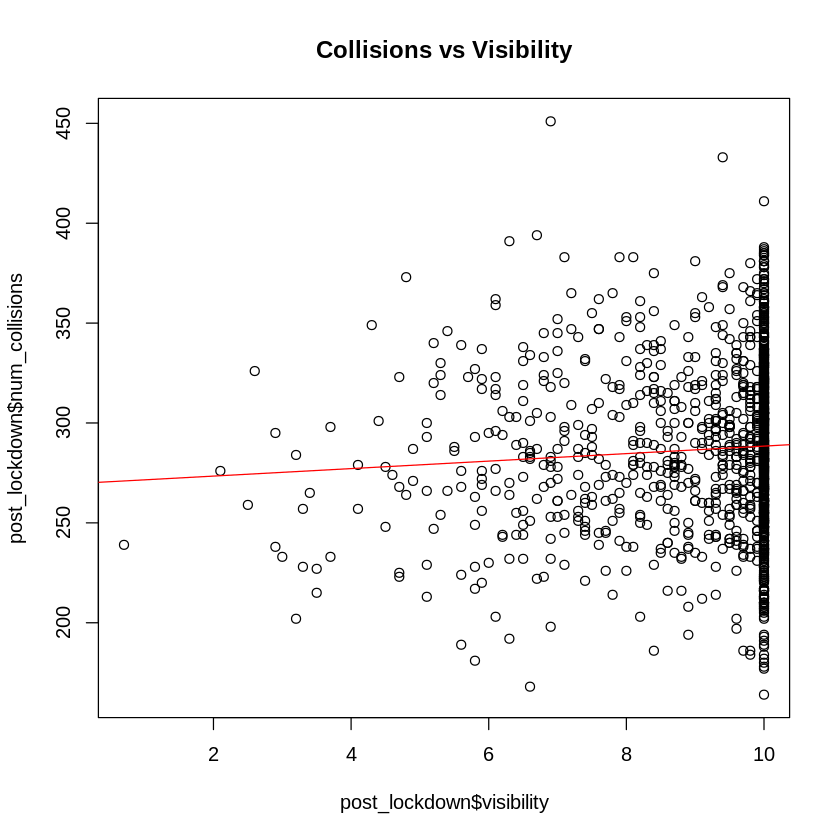

In [ ]:
#scatter plot of raw data
plot(post_lockdown$visibility, post_lockdown$num_collisions, main = "Collisions vs Visibility")

#add a trend line
visib_fit_post <- lm(num_collisions ~ visibility, data = post_lockdown)
abline(visib_fit_post, col = "red")


In [ ]:
summary(visib_fit_post)


Call:
lm(formula = num_collisions ~ visibility, data = post_lockdown)

Residuals:
    Min      1Q  Median      3Q     Max 
-124.43  -29.43   -1.43   28.57  168.38 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 269.6757     7.4373  36.260   <2e-16 ***
visibility    1.8755     0.8066   2.325   0.0202 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 41.93 on 1224 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.004397,	Adjusted R-squared:  0.003584 
F-statistic: 5.406 on 1 and 1224 DF,  p-value: 0.02023


In post-lockdown data, a positive rather than negative relationship is found with visibility. This could be due to less traffic and more pedestrians post-lockdown due to behaviour change. However, as we cannot decipher a consistent relationship and the relationship is weak, we will not use the visibility variable for our models and linear regression.

##Day of the Week

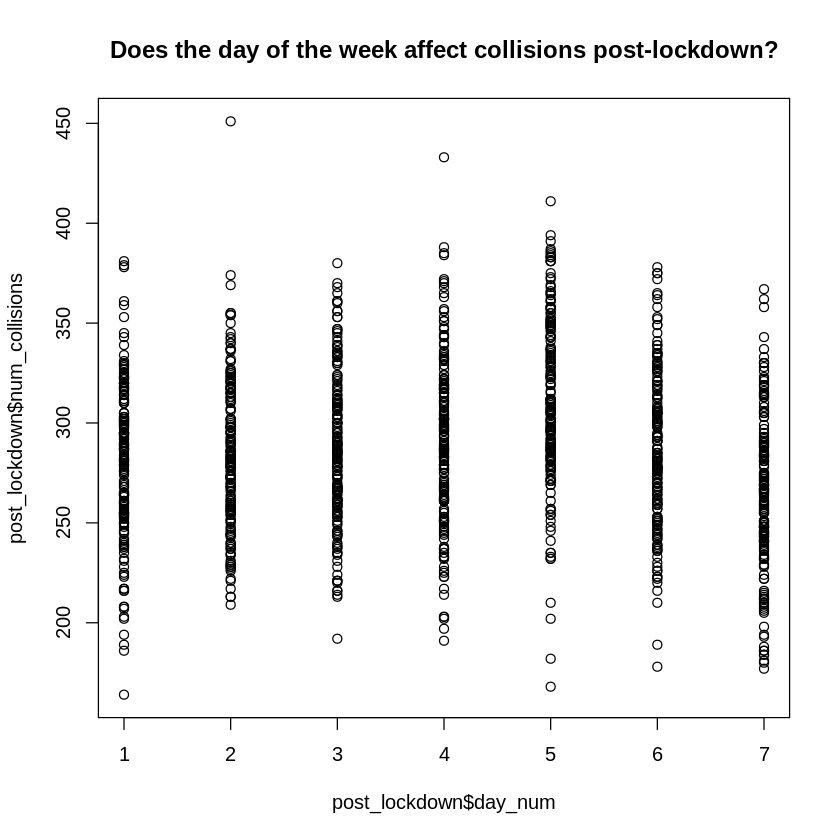

In [ ]:
#plotting day of the week
plot(post_lockdown$day_num, post_lockdown$num_collisions, main="Does the day of the week affect collisions post-lockdown?")

As with pre-lockdown there is a clear correlation with day of the week, and with even less outliers. Though we can remove some outliers to give a clearer correlation.

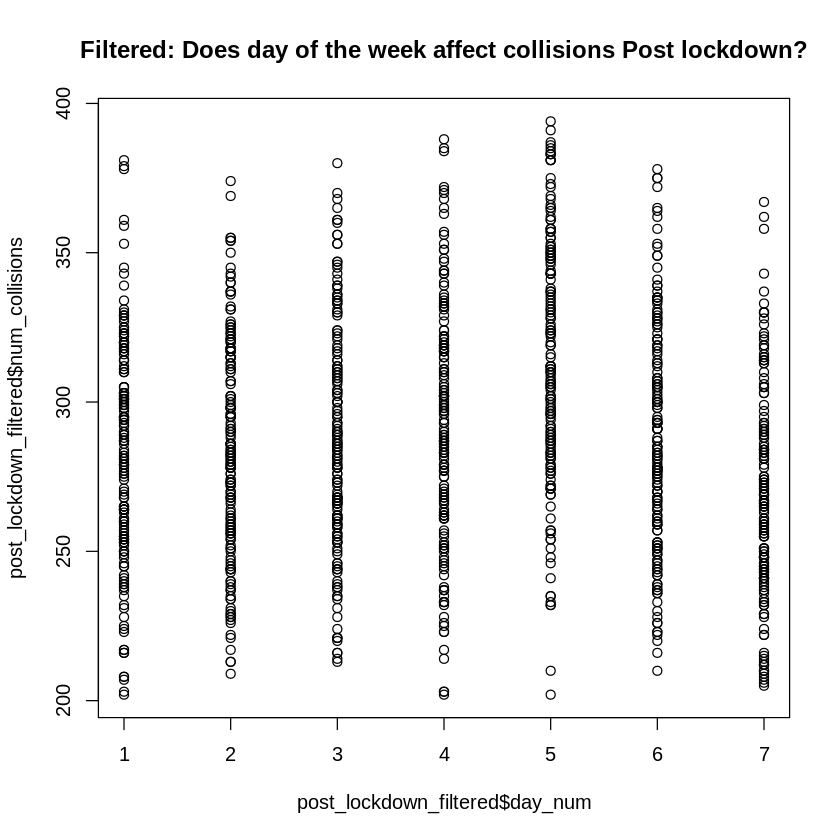

In [ ]:
#create logical index for num_collisions between 200 and 400
valid_range_post <- post_lockdown$num_collisions >= 200 & post_lockdown$num_collisions <= 400

#subset dataframe to remove outliers
post_lockdown_filtered <- post_lockdown[valid_range_post, ]

#plot new dataset
plot(post_lockdown_filtered$day_num, post_lockdown_filtered$num_collisions, main = "Filtered: Does day of the week affect collisions Post lockdown?")

It is looking as though the post-lockdown dataset is following a similar pattern in terms of days of the week (just at a lower volume) to the pre-lockdown dataset. To make this clearer, the days can also be re-ordered to show a linear relationship.

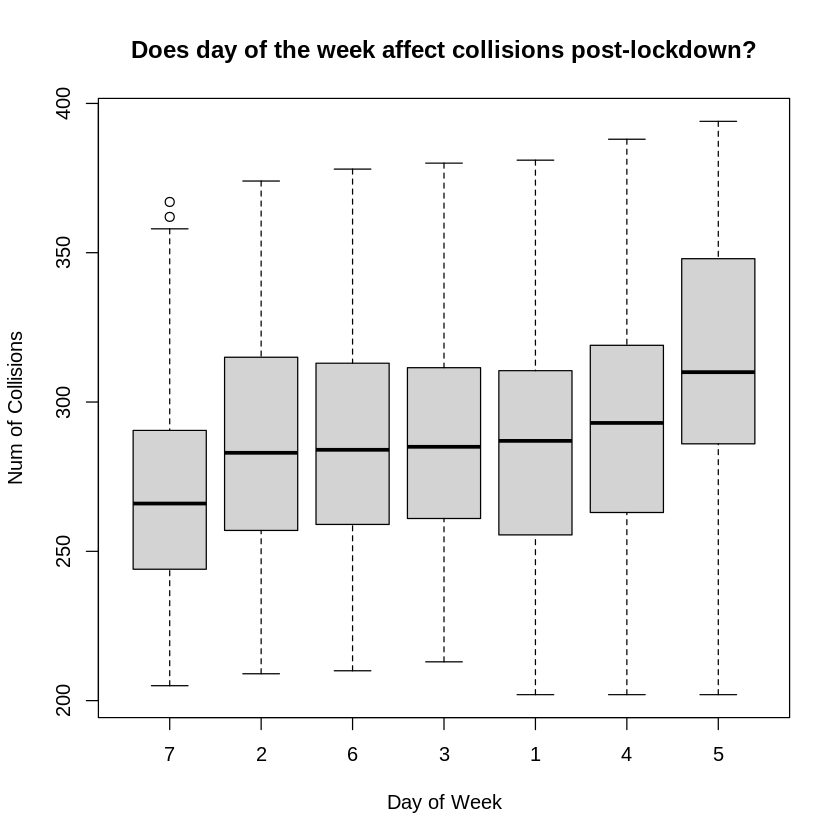

In [ ]:
#re-order for days
re_order_post <- c("7", "2", "6", "3", "1", "4", "5")

#convert 'day_num' to factor with re-order
post_lockdown_filtered$day_num <- factor(post_lockdown_filtered$day_num, levels = re_order_post)

#box plot
boxplot(
  post_lockdown_filtered$num_collisions ~ post_lockdown_filtered$day_num,
  main = "Does day of the week affect collisions post-lockdown?",
  xlab = "Day of Week",
  ylab = "Num of Collisions"
)

This appears to follow a very similar pattern as pre-lockdown. Further analysis shows that there are similarities in terms of the weekends, with Sunday and Saturday being the lowest collisions and Friday and Thursday being the highest. However, although similar, there has been a change in the order of Monday, Tuesday, and Wednesday. This change and the differences compared with pre-lockdown can be seen more clearly in the below bar chart. This would require further investigation as to why this is the case.

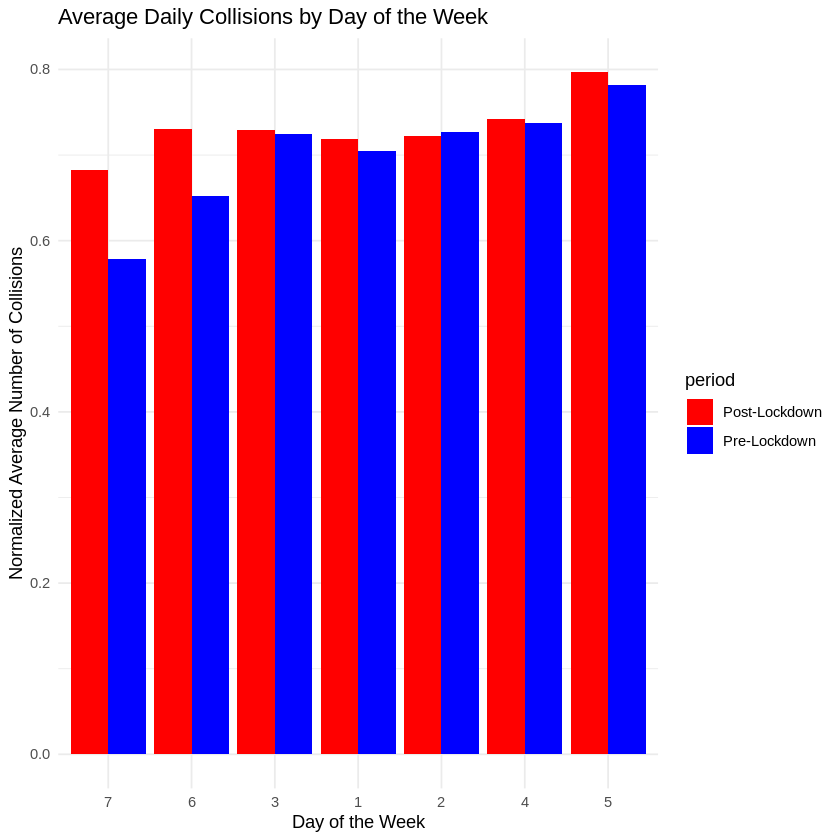

In [ ]:
#install and load ggplot2 package if not already installed
if (!requireNamespace("ggplot2", quietly = TRUE)) {
  install.packages("ggplot2")
}

#load ggplot2 package
library(ggplot2)

#combine 2 data sets into 1, adding . variable to separate
pre_lockdown_filtered$period <- "Pre-Lockdown"
post_lockdown_filtered$period <- "Post-Lockdown"

#factorise day_num with custom order for both datasets
pre_lockdown_filtered$day_num <- factor(pre_lockdown_filtered$day_num, levels = c(7, 6, 3, 1, 2, 4, 5))
post_lockdown_filtered$day_num <- factor(post_lockdown_filtered$day_num, levels = c(7, 6, 3, 1, 2, 4, 5))

#combine datasets
combined_data <- rbind(pre_lockdown_filtered, post_lockdown_filtered)

#calculate max values for scaling
max_pre_lockdown <- max(pre_lockdown_filtered$num_collisions)
max_post_lockdown <- max(post_lockdown_filtered$num_collisions)

#rescale num_collisions between 0 and 1
combined_data$norm_num_collisions <- ifelse(
  combined_data$period == "Pre-Lockdown",
  combined_data$num_collisions / max_pre_lockdown,
  combined_data$num_collisions / max_post_lockdown
)

#create bar chart with reordered days
ggplot(combined_data, aes(x = day_num, y = norm_num_collisions, fill = period)) +
  geom_bar(stat = "summary", fun = "mean", position = "dodge") +
  labs(title = "Average Daily Collisions by Day of the Week",
       x = "Day of the Week",
       y = "Normalized Average Number of Collisions") +
  scale_fill_manual(values = c("Pre-Lockdown" = "blue", "Post-Lockdown" = "red")) +
  theme_minimal()



##Max Temp

Again, there is a weak correlation with max_temp at 0.358158563574188. However, it is a slightly stronger relationship than in the pre-lockdown dataset at 0.230617319143517. Therefore, although it is weak, it is assumed that there is a relationship between temperature and the number of collisions.

In [ ]:
cor(post_lockdown_filtered$max_temp, post_lockdown_filtered$num_collisions)

[1] 0.3581586

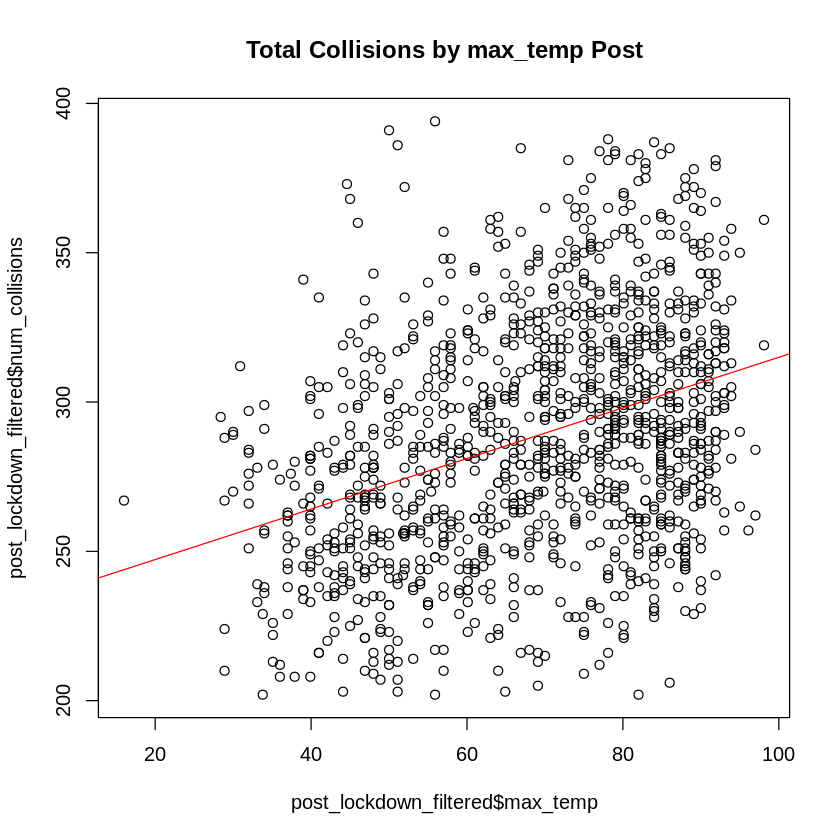

In [ ]:
#plot max temp data
plot(post_lockdown_filtered$max_temp, post_lockdown_filtered$num_collisions, main = "Total Collisions by max_temp Post")

#add line of best fit
temp_fit_post <- lm(post_lockdown_filtered$num_collisions ~ post_lockdown_filtered$max_temp)
abline(temp_fit_post, col = "red")

In [ ]:
summary(temp_fit_post)


Call:
lm(formula = post_lockdown_filtered$num_collisions ~ post_lockdown_filtered$max_temp)

Residuals:
    Min      1Q  Median      3Q     Max 
-97.744 -26.300  -1.956  24.418 118.351 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     230.31349    4.49518   51.24   <2e-16 ***
post_lockdown_filtered$max_temp   0.84672    0.06369   13.29   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 36.95 on 1201 degrees of freedom
Multiple R-squared:  0.1283,	Adjusted R-squared:  0.1276 
F-statistic: 176.7 on 1 and 1201 DF,  p-value: < 2.2e-16


The coefficient for the maximum temperature (0.84672) is positive and statistically significant, showing that on average, for each one-unit increase in the maximum temperature, the number of collisions increases by approximately 0.85. The low p-value (< 2.2e-16) for the F-statistic indicates that the overall model is statistically significant. However, while the model explains a significant portion of the variability in the data, it is important to note that the adjusted R-squared is suggesting that there are likely other factors influencing the number of collisions, such as the day of the week, as already highlighted.

##Month

Let's compare the patterns of seasonality for pre-lockdown and post-lockdown.

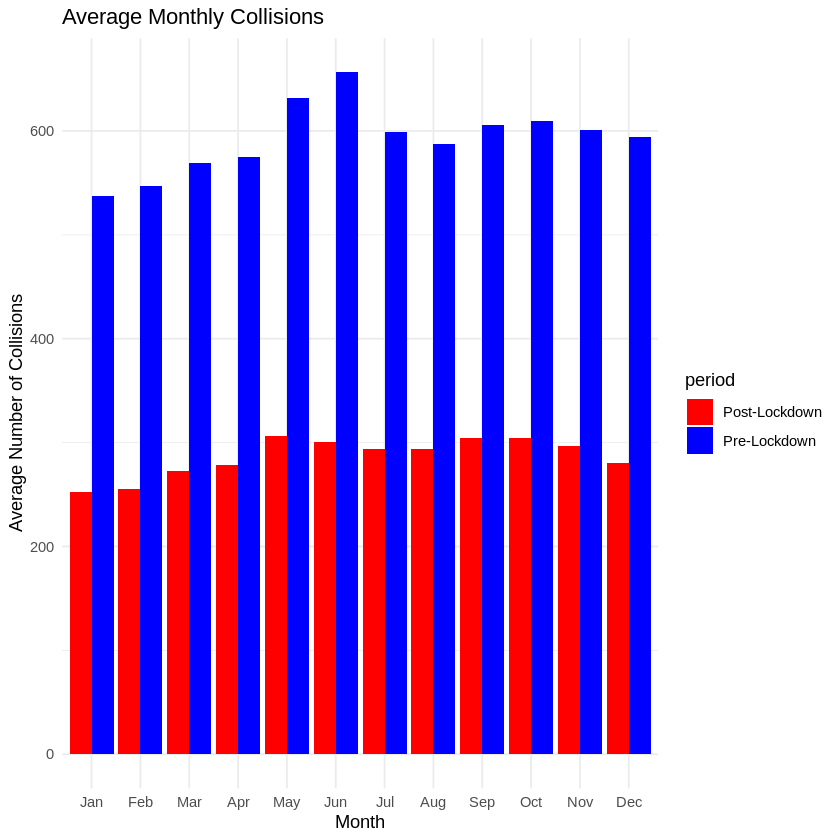

In [ ]:
#install and load ggplot2 package if not already installed
if (!requireNamespace("ggplot2", quietly = TRUE)) {
  install.packages("ggplot2")
}

#load ggplot2 package
library(ggplot2)

#adding the . column
pre_lockdown_filtered$period <- "Pre-Lockdown"
post_lockdown_filtered$period <- "Post-Lockdown"

#combining subset with post_lockdown data
combined_data <- rbind(pre_lockdown_filtered, post_lockdown_filtered)

#create bar chart
ggplot(combined_data, aes(x = factor(month), y = num_collisions, fill = period)) +
  geom_bar(stat = "summary", fun = "mean", position = "dodge") +
  labs(title = "Average Monthly Collisions",
       x = "Month",
       y = "Average Number of Collisions") +
  scale_x_discrete(labels = month.abb) +
  scale_fill_manual(values = c("Pre-Lockdown" = "blue", "Post-Lockdown" = "red")) +
  #scale_y_log10() +  #use logarithmic scale on y-axis
  theme_minimal()


As can be seen, there are clear patterns of seasonality. However, despite similarities, there have been subtle changes in post-lockdown seasonality when compared with pre-lockdown. These behaviour changes make the amalgamation of the two datasets unsuitable. Let's compare the patterns of seasonality for pre-lockdown and post-lockdown.

## Analysis

After analysing both pre- and post-lockdown data, it is clear that similar patterns have emerged, just at a lower volume for post-lockdown data. However, due to the subtle differences in days of the week, monthly seasonality, and visibility, we will use only pre-lockdown data for our regression models.

# Check for problem Locations

It is obvious that location will be a consideration that will affect the number of collisions, as some areas will be more busy and at higher risk than others. Therefore, another data set was pulled from BigQuery containing borough, latitude, and longitude.

In [ ]:
#Bring across the full location data and split it as above
#Location Data
locations_12_19 <- read.csv('https://raw.githubusercontent.com/Ritchie-Robinson/22024961_DataAnalytics/main/collision_locations_2012_2019.csv')
locations_20_23 <- read.csv('https://raw.githubusercontent.com/Ritchie-Robinson/22024961_DataAnalytics/main/collision_locations_2020_2023.csv')

In [ ]:
head(locations_12_19)

,borough,latitude,longitude,collision_date,num_collisions
,<chr>,<dbl>,<dbl>,<chr>,<int>
1,,40.59570,-74.14100,2018-04-18,1
2,,40.65114,-73.89000,2017-12-18,1
3,,40.74000,-73.73855,2017-03-20,1
4,,40.77500,-73.96310,2017-07-19,1
5,,40.78890,-73.78700,2016-06-07,1
6,,40.58403,-73.96900,2018-04-13,1


Using a simple scatter plot below, it is clear that despite a couple of outliers, collisions are concentrated in a particular range of latitude and longitude coordinates, around longitude -75 and latitude from 40.5 to 40.9. This indicates a specific geographic area where accidents are more prevalent and would require further analysis.

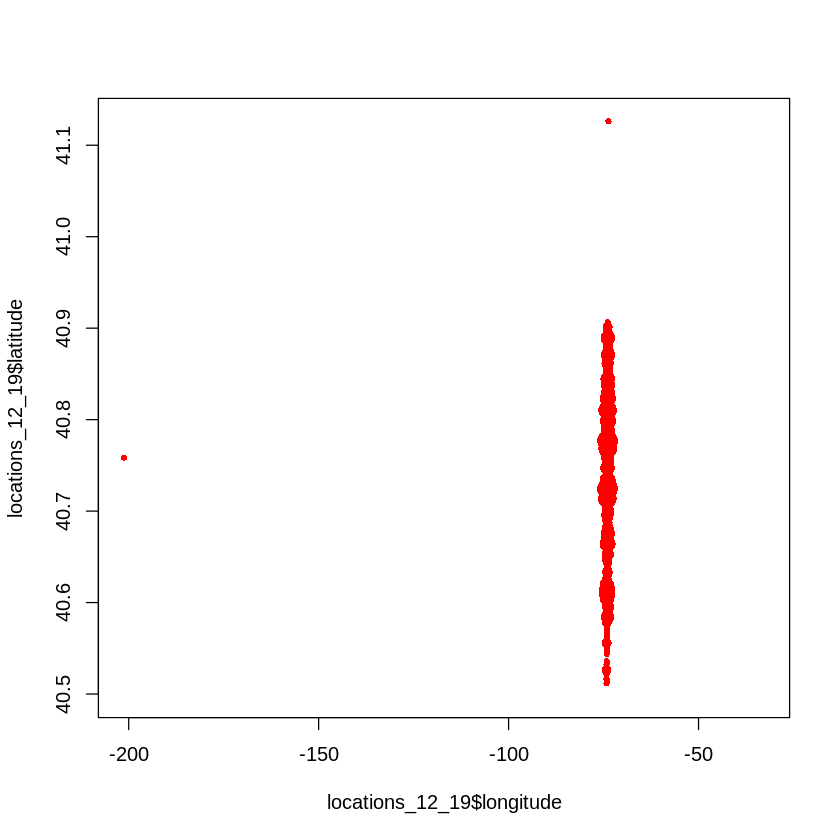

In [ ]:
plot(locations_12_19$longitude, locations_12_19$latitude, col = "red", pch = 16, cex = log(locations_12_19$num_collisions))

If we remove the outliers we can see this more clearly.

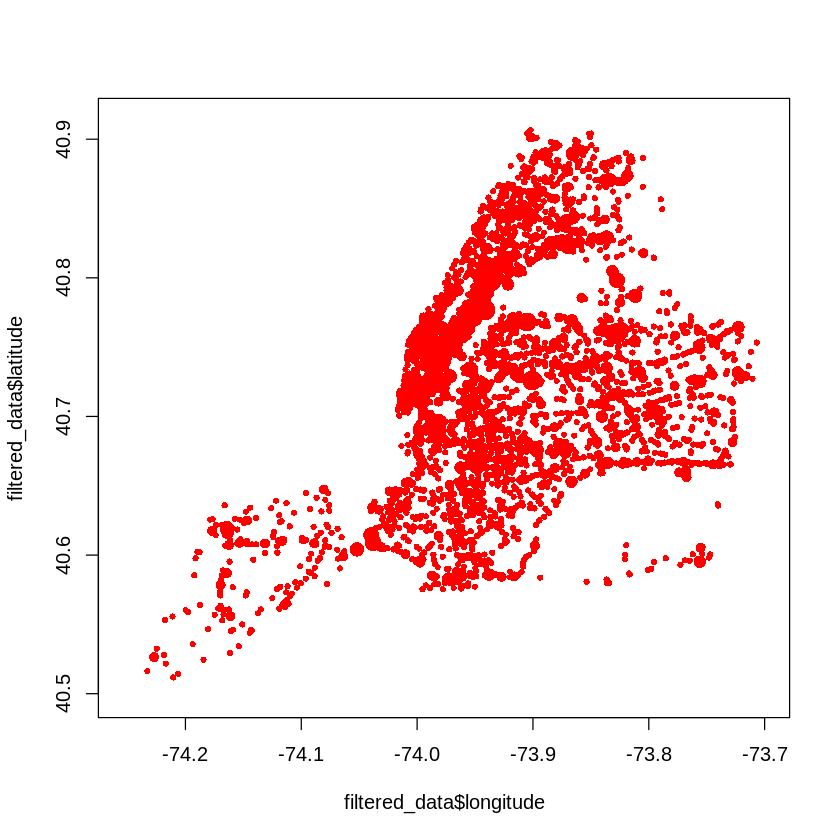

In [ ]:
# define longitude and latitude ranges to remove outliers
longitude_range <- c(-70, -80)
latitude_range <- c(30, 41)

#filter data based on longitude and latitude ranges
filtered_data <- subset(locations_12_19, longitude >= min(longitude_range) & longitude <= max(longitude_range) &
                                      latitude >= min(latitude_range) & latitude <= max(latitude_range))

#re-plot filtered data
plot(filtered_data$longitude, filtered_data$latitude, col = "red", pch = 16, cex = log(filtered_data$num_collisions))



As can be seen, the locality of collisions is very similar for both pre- and post-lockdown data. However, there are no outliers in the post-lockdown data.

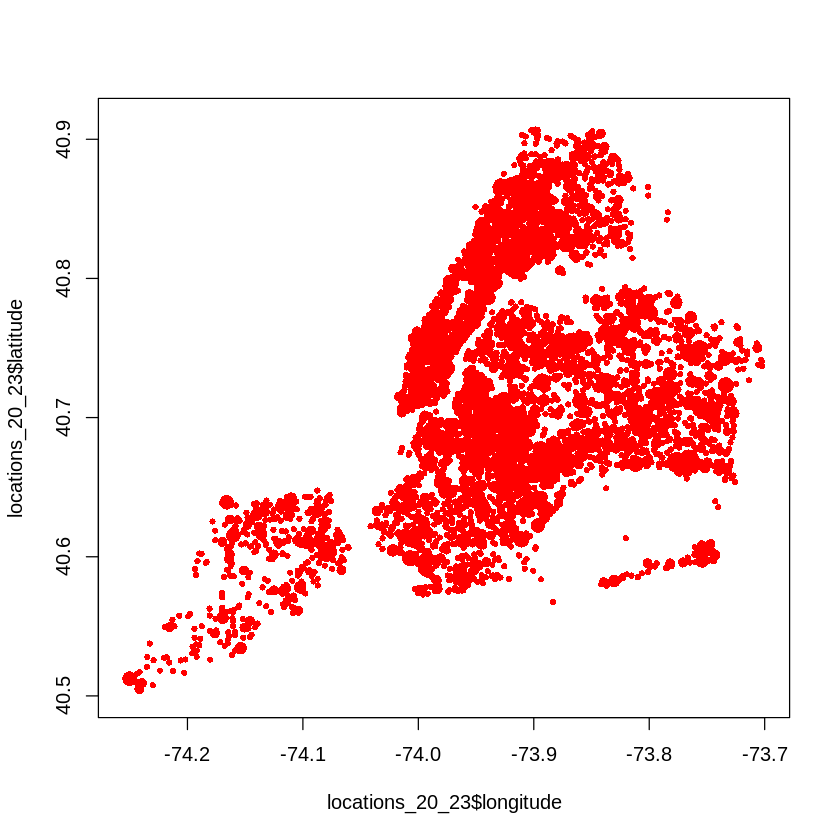

In [ ]:
#post lockdown (locations_20_23)
plot(locations_20_23$longitude, locations_20_23$latitude, col = "red", pch = 16, cex = log(locations_12_19$num_collisions))

Further investigation and analysis could be carried out for locations that appear to be collision hotspots. However, in this instance, we will not use location data for our linear model and instead will focus purely on the day of the week and maximum temperature for all locations.

#Year on Year

We can also check the data year-on-year to look for similar patterns. Similar to the comparison with pre-lockdown and post-lockdown, it is clear that seasonality is a contributing factor, as shown below.

In [ ]:
data_2013 <- pre_lockdown_filtered[pre_lockdown_filtered$year == 2013, ]
data_2014 <- pre_lockdown_filtered[pre_lockdown_filtered$year == 2014, ]
data_2015 <- pre_lockdown_filtered[pre_lockdown_filtered$year == 2015, ]

data_2016 <- pre_lockdown_filtered[pre_lockdown_filtered$year == 2016, ]
data_2017 <- pre_lockdown_filtered[pre_lockdown_filtered$year == 2017, ]
data_2018 <- pre_lockdown_filtered[pre_lockdown_filtered$year == 2018, ]

In [ ]:
library(ggplot2)

In [ ]:
dayofyear <- 1*seq_len(nrow(data_2013))
dayindex <- 1*seq_len(nrow(data_2013))
data_2013 <- cbind(dayindex, dayofyear, data_2013)
dayofyear <- 1*seq_len(nrow(data_2014))
dayindex <- 1*seq_len(nrow(data_2014)) + 365
data_2014 <- cbind(dayindex, dayofyear, data_2014)
dayofyear <- 1*seq_len(nrow(data_2015))
dayindex <- 1*seq_len(nrow(data_2015)) + 730
data_2015 <- cbind(dayindex, dayofyear, data_2015)

dayofyear <- 1*seq_len(nrow(data_2016))
dayindex <- 1*seq_len(nrow(data_2016))
data_2016 <- cbind(dayindex, dayofyear, data_2016)
dayofyear <- 1*seq_len(nrow(data_2017))
dayindex <- 1*seq_len(nrow(data_2017)) + 365
data_2017 <- cbind(dayindex, dayofyear, data_2017)
dayofyear <- 1*seq_len(nrow(data_2018))
dayindex <- 1*seq_len(nrow(data_2018)) + 730
data_2018 <- cbind(dayindex, dayofyear, data_2018)

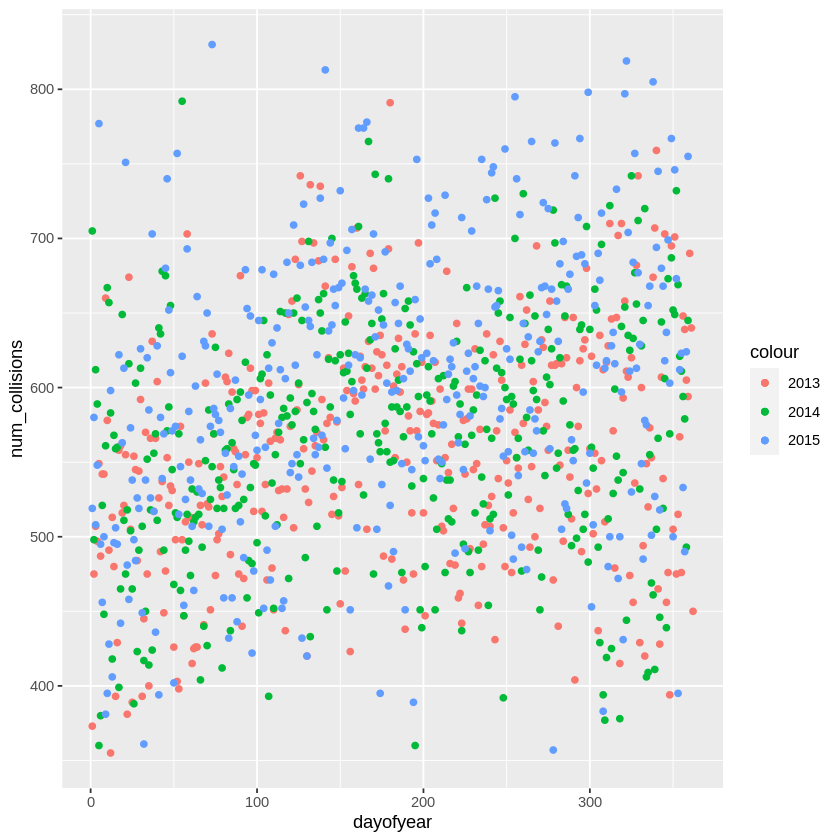

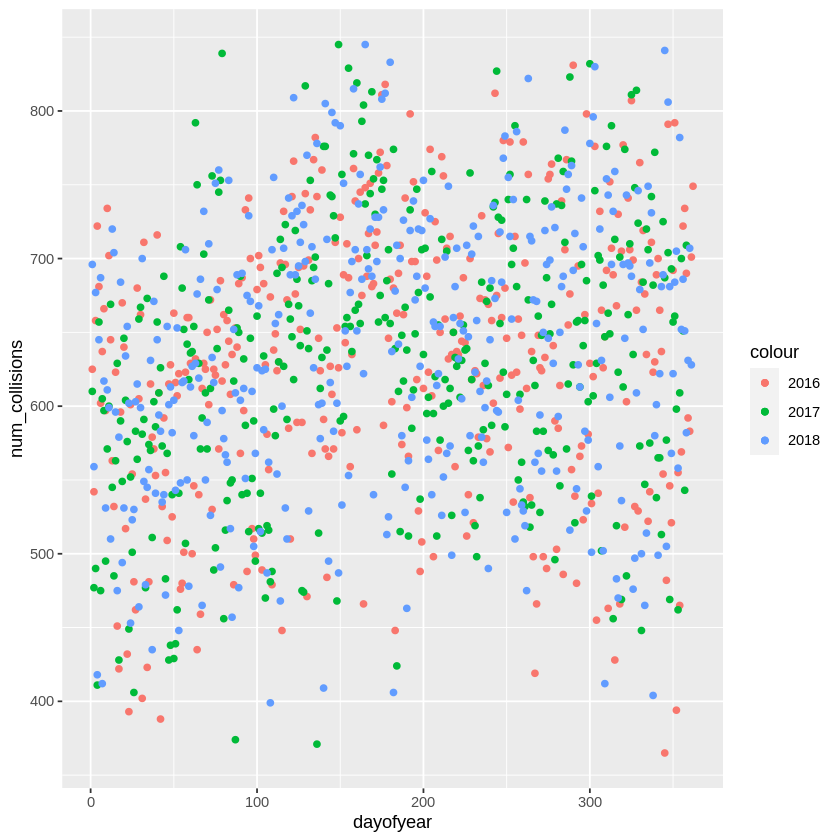

In [ ]:
ggplot() +
  geom_point(data=data_2013, aes(dayofyear, num_collisions, color="2013")) +
  geom_point(data=data_2014, aes(dayofyear, num_collisions, color="2014")) +
  geom_point(data=data_2015, aes(dayofyear, num_collisions, color="2015"))

ggplot() +
  geom_point(data=data_2016, aes(dayofyear, num_collisions, color="2016")) +
  geom_point(data=data_2017, aes(dayofyear, num_collisions, color="2017")) +
  geom_point(data=data_2018, aes(dayofyear, num_collisions, color="2018"))

Using the day index with the years side by side, the pattern is even clearer.

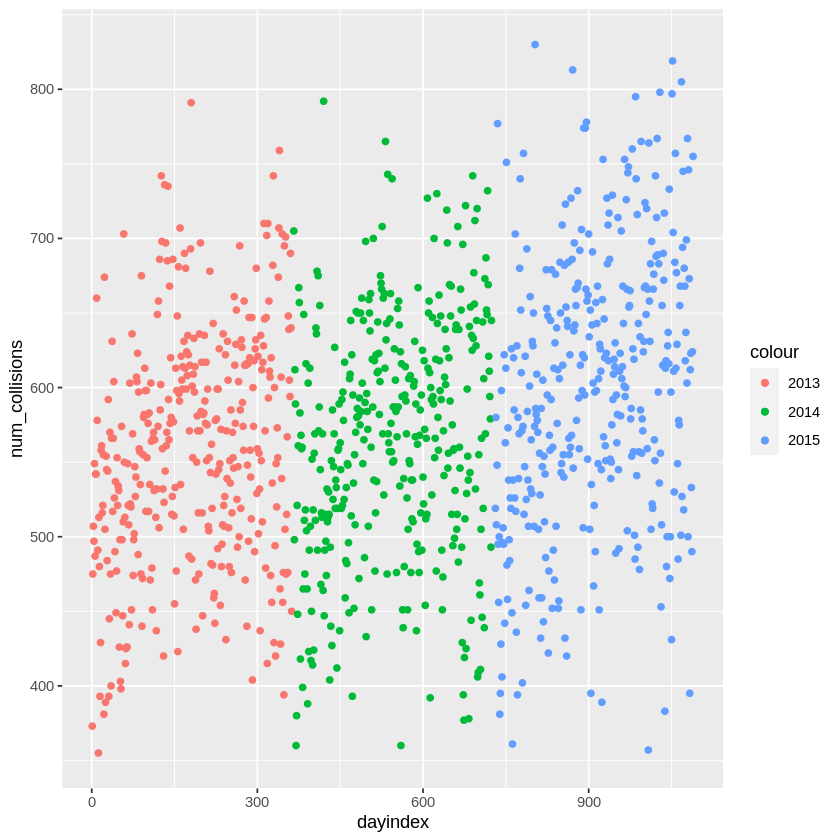

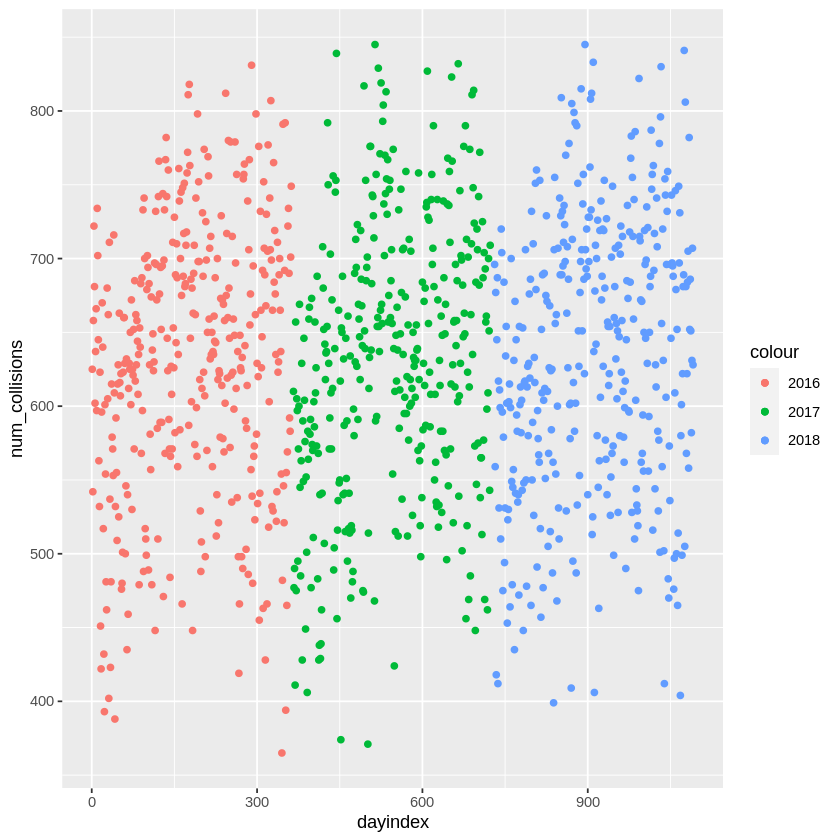

In [ ]:
ggplot() +
  geom_point(data=data_2013, aes(dayindex, num_collisions, color="2013")) +
  geom_point(data=data_2014, aes(dayindex, num_collisions, color="2014")) +
  geom_point(data=data_2015, aes(dayindex, num_collisions, color="2015"))

ggplot() +
  geom_point(data=data_2016, aes(dayindex, num_collisions, color="2016")) +
  geom_point(data=data_2017, aes(dayindex, num_collisions, color="2017")) +
  geom_point(data=data_2018, aes(dayindex, num_collisions, color="2018"))

There are still a few potential outliers within the higher collision range for the years 2013, 2014, and 2015. However, these data points will be kept as they could be due to public holidays that show constant seasonal variance in road use and therefore are important data points, and it is important not to remove too much important data. Further research could involve drilling down into these potential outliers to ascertain their exact importance and whether they are part of seasonal patterns due to special occasions or one-off events that do not conform to the usual seasonal pattern.

#Standardisation

Before running our linear model, we will standardise the independent variable max_temp, as well as the number of collisions. The day of the week is purely categorical and therefore does not require standardisation.

In [ ]:
#standardise temperature
pre_lockdown_filtered$max_temp_standardised <- scale(pre_lockdown_filtered$max_temp)
post_lockdown_filtered$max_temp_standardised <- scale(post_lockdown_filtered$max_temp)

In [ ]:
#standardise number of collisions
pre_lockdown_filtered$num_collisions_standardised <- scale(pre_lockdown_filtered$num_collisions)
post_lockdown_filtered$num_collisions_standardised <- scale(post_lockdown_filtered$num_collisions)

#One-Hot Encoding for DNN

Kunanbayev et al. (2021) state that “ordinal encoding does not change data dimensionality," and thus, it is more "memory-efficient". We have already encoded our day of the week and month variables to integer values. However, Kunanbayev et al. (2021) go on to explain that “the spurious ordering induced by ordinal encoding among unordered categorical values” can negatively affect performance. Therefore, we must use one-hot encoding for these categorical input variables when using this data with the DNN. This is because otherwise the DNN may find a pattern in the ranking of days of the week 1–7 or months of the year 1–12.

In [ ]:

#copy original dataframe to a new one
pre_lockdown_filtered_hot <- pre_lockdown_filtered

pre_lockdown_filtered_hot$month[pre_lockdown_filtered_hot$month == 1] <- 'Jan'
pre_lockdown_filtered_hot$month[pre_lockdown_filtered_hot$month == 2] <- 'Feb'
pre_lockdown_filtered_hot$month[pre_lockdown_filtered_hot$month == 3] <- 'Mar'
pre_lockdown_filtered_hot$month[pre_lockdown_filtered_hot$month == 4] <- 'Apr'
pre_lockdown_filtered_hot$month[pre_lockdown_filtered_hot$month == 5] <- 'May'
pre_lockdown_filtered_hot$month[pre_lockdown_filtered_hot$month == 6] <- 'Jun'
pre_lockdown_filtered_hot$month[pre_lockdown_filtered_hot$month == 7] <- 'Jul'
pre_lockdown_filtered_hot$month[pre_lockdown_filtered_hot$month == 8] <- 'Aug'
pre_lockdown_filtered_hot$month[pre_lockdown_filtered_hot$month == 9] <- 'Sep'
pre_lockdown_filtered_hot$month[pre_lockdown_filtered_hot$month == 10] <- 'Oct'
pre_lockdown_filtered_hot$month[pre_lockdown_filtered_hot$month == 11] <- 'Nov'
pre_lockdown_filtered_hot$month[pre_lockdown_filtered_hot$month == 12] <- 'Dec'

#As day_num will n longer be used as categorical data within the DNN, we can convert it from fct to character

pre_lockdown_filtered_hot$day_num <- as.character(pre_lockdown_filtered_hot$day_num)


pre_lockdown_filtered_hot$day_num[pre_lockdown_filtered_hot$day_num == 1] <- 'Mon'
pre_lockdown_filtered_hot$day_num[pre_lockdown_filtered_hot$day_num == 2] <- 'Tue'
pre_lockdown_filtered_hot$day_num[pre_lockdown_filtered_hot$day_num == 3] <- 'Wed'
pre_lockdown_filtered_hot$day_num[pre_lockdown_filtered_hot$day_num == 4] <- 'Thu'
pre_lockdown_filtered_hot$day_num[pre_lockdown_filtered_hot$day_num == 5] <- 'Fri'
pre_lockdown_filtered_hot$day_num[pre_lockdown_filtered_hot$day_num == 6] <- 'Sat'
pre_lockdown_filtered_hot$day_num[pre_lockdown_filtered_hot$day_num == 7] <- 'Sun'

#print new df
head(pre_lockdown_filtered_hot)

,day_num,year,month,day,collision_date,temp,max_temp,min_temp,humidity,mean_sea_level_pressure,⋯,fog,rain_drizzle,snow_ice_pellets,hail,thunder,tornado_funnel_cloud,num_collisions,period,max_temp_standardised,num_collisions_standardised
,<chr>,<int>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,"<dbl[,1]>","<dbl[,1]>"
1,Thu,2019,Jan,17,2019-01-17,30.1,39.0,24.1,10.0,1026.1,⋯,0,0,0,0,0,0,586,Pre-Lockdown,-1.4660707,-0.0660299
2,Fri,2014,Jan,24,2014-01-24,14.7,19.4,10.4,-3.6,NA,⋯,0,0,0,0,0,0,705,Pre-Lockdown,-2.5619285,1.1789536
3,Sun,2019,Jan,27,2019-01-27,39.6,48.9,24.1,22.2,1018.6,⋯,0,0,0,0,0,0,445,Pre-Lockdown,-0.9125507,-1.5411785
4,Wed,2019,Jan,2,2019-01-02,38.0,57.9,35.1,23.2,1024.2,⋯,0,0,0,0,0,0,502,Pre-Lockdown,-0.4093507,-0.9448418
5,Mon,2019,Jan,14,2019-01-14,26.7,33.1,21.9,11.2,1024.2,⋯,0,0,0,0,0,0,703,Pre-Lockdown,-1.7959462,1.1580296
6,Wed,2019,Jan,9,2019-01-09,42.7,45.0,34.0,30.1,1001.6,⋯,0,1,0,0,0,0,514,Pre-Lockdown,-1.1306040,-0.8192973


In [ ]:
months <- model.matrix(~0+pre_lockdown_filtered_hot$month)
head(months)

,pre_lockdown_filtered_hot$monthApr,pre_lockdown_filtered_hot$monthAug,pre_lockdown_filtered_hot$monthDec,pre_lockdown_filtered_hot$monthFeb,pre_lockdown_filtered_hot$monthJan,pre_lockdown_filtered_hot$monthJul,pre_lockdown_filtered_hot$monthJun,pre_lockdown_filtered_hot$monthMar,pre_lockdown_filtered_hot$monthMay,pre_lockdown_filtered_hot$monthNov,pre_lockdown_filtered_hot$monthOct,pre_lockdown_filtered_hot$monthSep
1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,0,0
6,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
colnames(months) <- c("Apr", "Aug", "Dec", "Feb", "Jan", "Jul", "Jun", "Mar", "May", "Nov", "Oct", "Sep")
head(months)

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,0,0
6,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
daysofweek <- model.matrix(~0+pre_lockdown_filtered_hot$day_num)
head(daysofweek)

,pre_lockdown_filtered_hot$day_numFri,pre_lockdown_filtered_hot$day_numMon,pre_lockdown_filtered_hot$day_numSat,pre_lockdown_filtered_hot$day_numSun,pre_lockdown_filtered_hot$day_numThu,pre_lockdown_filtered_hot$day_numTue,pre_lockdown_filtered_hot$day_numWed
1,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0
3,0,0,0,1,0,0,0
4,0,0,0,0,0,0,1
5,0,1,0,0,0,0,0
6,0,0,0,0,0,0,1


In [ ]:
colnames(daysofweek) <- c("Fri", "Mon", "Sat", "Sun", "Thu", "Tue", "Wed")
head(daysofweek)

,Fri,Mon,Sat,Sun,Thu,Tue,Wed
1,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0
3,0,0,0,1,0,0,0
4,0,0,0,0,0,0,1
5,0,1,0,0,0,0,0
6,0,0,0,0,0,0,1


In [ ]:
#Let's normalise collision values
SCALE_NUM_COLL <- 1.0

#scale num_collisions column
pre_lockdown_filtered_hot$num_collisions <- (pre_lockdown_filtered_hot$num_collisions - min(pre_lockdown_filtered_hot$num_collisions)) / (max(pre_lockdown_filtered_hot$num_collisions) - min(pre_lockdown_filtered_hot$num_collisions)) * SCALE_NUM_COLL

#print out first 10 rows
head(pre_lockdown_filtered_hot)


,day_num,year,month,day,collision_date,temp,max_temp,min_temp,humidity,mean_sea_level_pressure,⋯,fog,rain_drizzle,snow_ice_pellets,hail,thunder,tornado_funnel_cloud,num_collisions,period,max_temp_standardised,num_collisions_standardised
,<chr>,<int>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<chr>,"<dbl[,1]>","<dbl[,1]>"
1,Thu,2019,Jan,17,2019-01-17,30.1,39.0,24.1,10.0,1026.1,⋯,0,0,0,0,0,0,0.4735772,Pre-Lockdown,-1.4660707,-0.0660299
2,Fri,2014,Jan,24,2014-01-24,14.7,19.4,10.4,-3.6,NA,⋯,0,0,0,0,0,0,0.7154472,Pre-Lockdown,-2.5619285,1.1789536
3,Sun,2019,Jan,27,2019-01-27,39.6,48.9,24.1,22.2,1018.6,⋯,0,0,0,0,0,0,0.1869919,Pre-Lockdown,-0.9125507,-1.5411785
4,Wed,2019,Jan,2,2019-01-02,38.0,57.9,35.1,23.2,1024.2,⋯,0,0,0,0,0,0,0.3028455,Pre-Lockdown,-0.4093507,-0.9448418
5,Mon,2019,Jan,14,2019-01-14,26.7,33.1,21.9,11.2,1024.2,⋯,0,0,0,0,0,0,0.7113821,Pre-Lockdown,-1.7959462,1.1580296
6,Wed,2019,Jan,9,2019-01-09,42.7,45.0,34.0,30.1,1001.6,⋯,0,1,0,0,0,0,0.3272358,Pre-Lockdown,-1.1306040,-0.8192973


In [ ]:
#Now create new dataframe for DNN
dnndata <- data.frame(months, daysofweek, pre_lockdown_filtered_hot$year, pre_lockdown_filtered_hot$max_temp_standardised, pre_lockdown_filtered_hot$num_collisions)


In [ ]:
head(dnndata)

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,⋯,Fri,Mon,Sat,Sun,Thu,Tue,Wed,pre_lockdown_filtered_hot.year,pre_lockdown_filtered_hot.max_temp_standardised,pre_lockdown_filtered_hot.num_collisions
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
1,0,0,0,0,1,0,0,0,0,0,⋯,0,0,0,0,1,0,0,2019,-1.4660707,0.4735772
2,0,0,0,0,1,0,0,0,0,0,⋯,1,0,0,0,0,0,0,2014,-2.5619285,0.7154472
3,0,0,0,0,1,0,0,0,0,0,⋯,0,0,0,1,0,0,0,2019,-0.9125507,0.1869919
4,0,0,0,0,1,0,0,0,0,0,⋯,0,0,0,0,0,0,1,2019,-0.4093507,0.3028455
5,0,0,0,0,1,0,0,0,0,0,⋯,0,1,0,0,0,0,0,2019,-1.7959462,0.7113821
6,0,0,0,0,1,0,0,0,0,0,⋯,0,0,0,0,0,0,1,2019,-1.1306040,0.3272358


In [ ]:
library(dplyr)

#define function to remove prefix
remove_prefix <- function(name) {
  gsub("pre_lockdown_filtered_hot\\.", "", name)
}

#rename columns
dnndata <- dnndata %>%
  rename_with(remove_prefix, everything())

#print
head(dnndata)

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,⋯,Fri,Mon,Sat,Sun,Thu,Tue,Wed,year,max_temp_standardised,num_collisions
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
1,0,0,0,0,1,0,0,0,0,0,⋯,0,0,0,0,1,0,0,2019,-1.4660707,0.4735772
2,0,0,0,0,1,0,0,0,0,0,⋯,1,0,0,0,0,0,0,2014,-2.5619285,0.7154472
3,0,0,0,0,1,0,0,0,0,0,⋯,0,0,0,1,0,0,0,2019,-0.9125507,0.1869919
4,0,0,0,0,1,0,0,0,0,0,⋯,0,0,0,0,0,0,1,2019,-0.4093507,0.3028455
5,0,0,0,0,1,0,0,0,0,0,⋯,0,1,0,0,0,0,0,2019,-1.7959462,0.7113821
6,0,0,0,0,1,0,0,0,0,0,⋯,0,0,0,0,0,0,1,2019,-1.1306040,0.3272358


In [ ]:
summary(dnndata)

      Apr               Aug               Dec               Feb         
 Min.   :0.00000   Min.   :0.00000   Min.   :0.00000   Min.   :0.00000  
 1st Qu.:0.00000   1st Qu.:0.00000   1st Qu.:0.00000   1st Qu.:0.00000  
 Median :0.00000   Median :0.00000   Median :0.00000   Median :0.00000  
 Mean   :0.07523   Mean   :0.08927   Mean   :0.08603   Mean   :0.07991  
 3rd Qu.:0.00000   3rd Qu.:0.00000   3rd Qu.:0.00000   3rd Qu.:0.00000  
 Max.   :1.00000   Max.   :1.00000   Max.   :1.00000   Max.   :1.00000  
      Jan               Jul               Jun               Mar         
 Min.   :0.00000   Min.   :0.00000   Min.   :0.00000   Min.   :0.00000  
 1st Qu.:0.00000   1st Qu.:0.00000   1st Qu.:0.00000   1st Qu.:0.00000  
 Median :0.00000   Median :0.00000   Median :0.00000   Median :0.00000  
 Mean   :0.08639   Mean   :0.08927   Mean   :0.07559   Mean   :0.08243  
 3rd Qu.:0.00000   3rd Qu.:0.00000   3rd Qu.:0.00000   3rd Qu.:0.00000  
 Max.   :1.00000   Max.   :1.00000   Max.   :1.0000

In [ ]:
write.csv(dnndata, file="/content/dnndata.csv")

# Results LM


Below are the results from our linear models.

##Non-Standardisation Results

Below are the results from the pre-lockdown filtered data, with no standardisation.

In [ ]:
#create linear model
lm_model <- lm(num_collisions ~ day_num + max_temp, data = pre_lockdown_filtered)

#summary of linear model
summary(lm_model)



Call:
lm(formula = num_collisions ~ day_num + max_temp, data = pre_lockdown_filtered)

Residuals:
    Min      1Q  Median      3Q     Max 
-328.11  -48.53    1.43   49.72  260.56 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 408.00079    6.63563   61.49   <2e-16 ***
day_num6     63.42770    5.49556   11.54   <2e-16 ***
day_num3    123.35744    5.49868   22.43   <2e-16 ***
day_num1    107.24364    5.50208   19.49   <2e-16 ***
day_num2    125.44248    5.49873   22.81   <2e-16 ***
day_num4    134.08922    5.50209   24.37   <2e-16 ***
day_num5    172.48156    5.52675   31.21   <2e-16 ***
max_temp      1.23565    0.08211   15.05   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 77.37 on 2770 degrees of freedom
Multiple R-squared:  0.3464,	Adjusted R-squared:  0.3448 
F-statistic: 209.8 on 7 and 2770 DF,  p-value: < 2.2e-16


We will export the new data set to a CSV file.

In [ ]:
head(pre_lockdown_filtered)

,day_num,year,month,day,collision_date,temp,max_temp,min_temp,humidity,mean_sea_level_pressure,⋯,fog,rain_drizzle,snow_ice_pellets,hail,thunder,tornado_funnel_cloud,num_collisions,period,max_temp_standardised,num_collisions_standardised
,<fct>,<int>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,"<dbl[,1]>","<dbl[,1]>"
1,4,2019,1,17,2019-01-17,30.1,39.0,24.1,10.0,1026.1,⋯,0,0,0,0,0,0,586,Pre-Lockdown,-1.4660707,-0.0660299
2,5,2014,1,24,2014-01-24,14.7,19.4,10.4,-3.6,NA,⋯,0,0,0,0,0,0,705,Pre-Lockdown,-2.5619285,1.1789536
3,7,2019,1,27,2019-01-27,39.6,48.9,24.1,22.2,1018.6,⋯,0,0,0,0,0,0,445,Pre-Lockdown,-0.9125507,-1.5411785
4,3,2019,1,2,2019-01-02,38.0,57.9,35.1,23.2,1024.2,⋯,0,0,0,0,0,0,502,Pre-Lockdown,-0.4093507,-0.9448418
5,1,2019,1,14,2019-01-14,26.7,33.1,21.9,11.2,1024.2,⋯,0,0,0,0,0,0,703,Pre-Lockdown,-1.7959462,1.1580296
6,3,2019,1,9,2019-01-09,42.7,45.0,34.0,30.1,1001.6,⋯,0,1,0,0,0,0,514,Pre-Lockdown,-1.1306040,-0.8192973


In [ ]:
lmfiltered <- pre_lockdown_filtered[,c(1,7, 23)]

In [ ]:
head(lmfiltered)

,day_num,max_temp,num_collisions
,<fct>,<dbl>,<int>
1,4,39.0,586
2,5,19.4,705
3,7,48.9,445
4,3,57.9,502
5,1,33.1,703
6,3,45.0,514


In [ ]:
write.csv(lmfiltered, file="/content/lmfiltered.csv")

As day num has the strongest correlation out of the two input variables, we will export versions of the above with just the day num variable to compare.

In [ ]:
lmfiltered_day_only <- pre_lockdown_filtered[,c(1, 23)]

In [ ]:
head(lmfiltered_day_only)

,day_num,num_collisions
,<fct>,<int>
1,4,586
2,5,705
3,7,445
4,3,502
5,1,703
6,3,514


In [ ]:
write.csv(lmfiltered_day_only, file="/content/lmfiltered_day_only.csv")

##Standardised Results

Below are the results from the pre-lockdown filtered data with the maximum temperature standardised.

In [ ]:
#independent variables max_temp standardised

#create linear model
lm_model_stan <- lm(num_collisions ~ day_num + max_temp_standardised, data = pre_lockdown_filtered)

#summary of linear model
summary(lm_model_stan)



Call:
lm(formula = num_collisions ~ day_num + max_temp_standardised, 
    data = pre_lockdown_filtered)

Residuals:
    Min      1Q  Median      3Q     Max 
-328.11  -48.53    1.43   49.72  260.56 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)            488.592      3.903  125.19   <2e-16 ***
day_num6                63.428      5.496   11.54   <2e-16 ***
day_num3               123.357      5.499   22.43   <2e-16 ***
day_num1               107.244      5.502   19.49   <2e-16 ***
day_num2               125.442      5.499   22.81   <2e-16 ***
day_num4               134.089      5.502   24.37   <2e-16 ***
day_num5               172.482      5.527   31.21   <2e-16 ***
max_temp_standardised   22.100      1.469   15.05   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 77.37 on 2770 degrees of freedom
Multiple R-squared:  0.3464,	Adjusted R-squared:  0.3448 
F-statistic: 209.8 on 7 and 2770 DF

In [ ]:
head(pre_lockdown_filtered)

,day_num,year,month,day,collision_date,temp,max_temp,min_temp,humidity,mean_sea_level_pressure,⋯,fog,rain_drizzle,snow_ice_pellets,hail,thunder,tornado_funnel_cloud,num_collisions,period,max_temp_standardised,num_collisions_standardised
,<fct>,<int>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,"<dbl[,1]>","<dbl[,1]>"
1,4,2019,1,17,2019-01-17,30.1,39.0,24.1,10.0,1026.1,⋯,0,0,0,0,0,0,586,Pre-Lockdown,-1.4660707,-0.0660299
2,5,2014,1,24,2014-01-24,14.7,19.4,10.4,-3.6,NA,⋯,0,0,0,0,0,0,705,Pre-Lockdown,-2.5619285,1.1789536
3,7,2019,1,27,2019-01-27,39.6,48.9,24.1,22.2,1018.6,⋯,0,0,0,0,0,0,445,Pre-Lockdown,-0.9125507,-1.5411785
4,3,2019,1,2,2019-01-02,38.0,57.9,35.1,23.2,1024.2,⋯,0,0,0,0,0,0,502,Pre-Lockdown,-0.4093507,-0.9448418
5,1,2019,1,14,2019-01-14,26.7,33.1,21.9,11.2,1024.2,⋯,0,0,0,0,0,0,703,Pre-Lockdown,-1.7959462,1.1580296
6,3,2019,1,9,2019-01-09,42.7,45.0,34.0,30.1,1001.6,⋯,0,1,0,0,0,0,514,Pre-Lockdown,-1.1306040,-0.8192973


In [ ]:
lmfiltered_standardised <- pre_lockdown_filtered[,c(1,25, 23)]

In [ ]:
head(lmfiltered_standardised)

,day_num,max_temp_standardised,num_collisions
,<fct>,"<dbl[,1]>",<int>
1,4,-1.4660707,586
2,5,-2.5619285,705
3,7,-0.9125507,445
4,3,-0.4093507,502
5,1,-1.7959462,703
6,3,-1.1306040,514


In [ ]:
write.csv(lmfiltered_standardised, file="/content/lmfiltered_standardised.csv")

In [ ]:
lmfiltered_standardised_day_only <- pre_lockdown_filtered[,c(1, 23)]

In [ ]:
write.csv(lmfiltered_standardised_day_only, file="/content/lmfiltered_standardised_day_only.csv")

##Standardised independent variables and dependent variable, with combined data

Here we have combined the pre- and post-lockdown datasets and standardised the max_temperature and number of collisions. The number of collisions has been standardised to account for the lower volume post-lockdown. However, this model is a poorer fit overall and explains less of the variation. Thus, it is less useful and will not be exported for use with the linear regressor.

In [ ]:
#combine datasets
combined_data <- rbind(pre_lockdown_filtered, post_lockdown_filtered)

#create linear model
lm_model <- lm(num_collisions ~ day_num + max_temp, data = combined_data)

#summary of linear model
summary(lm_model)


Call:
lm(formula = num_collisions ~ day_num + max_temp, data = combined_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-343.26 -171.68   48.62  121.81  329.62 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 395.7839    11.5549  34.253  < 2e-16 ***
day_num6     48.0174     9.3811   5.119 3.23e-07 ***
day_num3     89.1616     9.3764   9.509  < 2e-16 ***
day_num1     78.1682     9.3968   8.319  < 2e-16 ***
day_num2     90.3879     9.3805   9.636  < 2e-16 ***
day_num4     98.5397     9.3886  10.496  < 2e-16 ***
day_num5    130.2857     9.4174  13.835  < 2e-16 ***
max_temp      0.4249     0.1419   2.994  0.00277 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 157.6 on 3973 degrees of freedom
Multiple R-squared:  0.05784,	Adjusted R-squared:  0.05618 
F-statistic: 34.85 on 7 and 3973 DF,  p-value: < 2.2e-16


# Conclusions

These linear models aimed to explain the variability in the number of collisions (num_collisions) using two input variables: day_num and max_temp.

The coefficients for each day of the week (day_num) indicate the expected change in the number of collisions and show a clear correlation. Also, maximum temperature plays a significant role too, shown in both the standardised and non-standardised results.

The assumption is that when temperatures increase with good weather, this will result in more road users, including cyclists and people travelling for leisure activities.

The statistical significance of the coefficients is confirmed by the very small p-values (< 2e-16), indicating that each predictor is highly likely to be a meaningful contributor to explaining variations in the number of collisions.

The overall model fit, as indicated by the multiple R-squared and adjusted R-squared values (0.3464 and 0.3418, respectively, for non-standardised and 0.3464 and 0.3448, respectively, for standardised), suggests that the model accounts for about 34% of the variability in the response variable. The F-statistic of 209.8, with very low p-values (< 2.2e-16), further supports the overall significance of the model and thus allows us to reject the null hypothesis (Frick, 1995).

However, it's important to note that the residual standard error is 77.37, which indicates the typical magnitude of errors in predicting the number of collisions. While the model explains a significant portion of the variance, further investigation and possibly the inclusion of additional variables from other datasets may enhance the model's accuracy, especially given the complexities associated with real-world data on traffic collisions in a place like New York.

##Model Comparisons

The above models applied slightly different approaches.

The first model utilised non-standardised independent variables (day_num and max_temp), showing significant relationships between these variables and the number of collisions.

Notably, the standardised coefficient in the second model, where the independent variable max temp was standardised, was identical to the non-standardised model. However, we will test these standardised and non-standardised data sets in our linear regressor in the next part of this project.

For both standardised and non-standardised models, we have also exported a data set with only one input variable, that being day_num, for each, as this was found to have the strongest correlation.

The last model incorporated combined pre- and post-lockdown data and standardised the dependent variable (num_collisions). In this case, while the coefficients for the predictors remained consistent, the overall model fit, as measured by the R-squared values, decreased. This decline in model fit suggests that combining data from pre- and post-lockdown periods has introduced complexities that might require further investigation.

Exploring additional input variables could be beneficial to enhance the accuracy of the model on this larger and more complex dataset. However, for now, we will not use this data set in the next part of this project.

# Bibliography

Alaidaros, H., Omar, M. and Romli, R. (2021) 'The state of the art of agile kanban method: challenges and opportunities', Independent Journal of Management & Production, 12(8), pp.2535-50.

Asuero, A.G., Sayago, A. and González, (2006) 'The Correlation Coefficient: An Overview', Critical reviews in analytical chemistry , 1(36), pp.41-59.

Bhandari, P. (2023) Normal Distribution | Examples, Formulas, & Uses. Available at: https://www.scribbr.co.uk/stats/the-normal-distribution/ (Accessed: 18 December 2023).

Damij, N. and Damij, T. (2021) 'An Approach to Optimizing Kanban Board Workflow and Shortening the Project Management Plan', IEEE transactions on engineering management pp.1-8.

Frick, R.W. (1995) 'Accepting the null hypothesis', Memory & Cognition, 23(1), pp.132-38.

Github (2023) 22024961_DataAnalytics. Available at: https://github.com/Ritchie-Robinson/22024961_DataAnalytics (Accessed: 04 October 2023).

Google (2023) Google Cloud Big Query. Available at: https://console.cloud.google.com/bigquery (Accessed: 04 October 2023).

Hanley, J.A. (2016) 'Simple and multiple linear regression: sample size considerations', Journal of Clinical Epidemiology, 79, pp.112-19.

Hutcheson, G. (2012) 'Missing Data: data replacement and imputation', Journal of Modelling in Management, 7(2).

Junior, M.L. and Filho, M.G. (2010) 'Variations of the kanban system: Literature review and classification', International journal of production economics, 125(1), pp.13-21.

Kunanbayev, K., Temirbek, I. and Zollanvari, A. (2021) 'Complex Encoding', 2021 International Joint Conference on Neural Networks (IJCNN) pp.1-6.

Nair, A. (2022) Standardization vs Normalization. Available at: https://towardsdatascience.com/standardization-vs-normalization-dc81f23085e3 (Accessed: 18 December 2023).

New York State (2021) Governor Cuomo Announces New York Ending COVID-19 State Disaster Emergency on June 24. Available at: https://www.governor.ny.gov/news/governor-cuomo-announces-new-york-ending-covid-19-state-disaster-emergency-june-24 (Accessed: 04 September 2023).

Osborne, J.W. and Overbay, (2004) 'The power of outliers (and why researchers should always check for them)', Practical Assessment, Research, and Evaluation, 9(1), p.6.

Saltz, J. and Suthrland, A. (2019) 'SKI: An Agile Framework for Data Science.' 2019 IEEE International Conference on Big Data (Big Data). Los Angeles, CA IEEE, pp.3468-76.

Shrestha, N. (2020) 'Detecting Multicollinearity in Regression Analysis', American Journal of Applied Mathematics and Statistics , 8(2), pp.39-42.

Todd, N. (2007) 'Descriptive Statistics', Topics in Biostatistics, 404, pp.33-52.

Xiong et al., H. (2006) 'Enhancing data analysis with noise removal', IEEE transactions on knowledge and data engineering, 18(3), pp.304-19.
